# <center>Final Project: Mapping the Globalization of Major League Baseball</center>
### <center>by Daniel Woldar</center>

This project looks to explore how the game of Major League Baseball has expanded since the inception of the National League in 1876. The goal of my project is to show how baseball started as an all-white, local sport in the Northeast of the United States and evolved into the global game. I plan to highlight this transition by looking at MLB player demographics. Namely, I am going to focus on place of birth and ethinicty of the league. My hope is that these two criteria can be used effectively to demonstrate just how global the game has become. I explain my data sources and how I plan to show this data in a bit more detail below.

### Table of Contents:

1. Introduction 
2. The Data Report
3. MLB Demographics Data
4. MLB Birth Places Data
5. Visual Comparison of the Data

## Introduction:

Major League Baseball has evolved tremendously since it was officially founded 141 years ago. To provide some context into how different Major League Baseball was in 1876, there were just 8 teams and 108 MLB players. The league was virtually a local sport. In fact, 62% of all Major League Baseball players were from either New York or Pennsylvania and every player was white.

Today, Major League Baseball has become a global sport. It has expanded to 30 teams across the United States and Canada. Last year, there were 1,482 different players in the MLB representing 22 diffrent countries. Major League Baseball has also become tremendously more diverse - a trend that became accelerated (though not originating) with Jackie Robinson breaking the color barrier in 1947. This presentation will show not only the evolution of the game, but also highlight the specific areas in which the expansion has been taking place.

## The Data:
For me to use the most comprehensive demographic/geographic data possible, I was forced to pull my data from a number of sources. While I was fortunate enough to get an excel file for the geographic data, the demographic data that I was able to find could not be extracted as CSV or Excel files, so I have been forced to web scrape my data. 

#### 2.1 | **Links to my data:**
+ [MLB Demographics 1947-2012](http://sabr.org/bioproj/topic/baseball-demographics-1947-2012) 
    + I will webscrape this data and will demonstrate how to webscrape below. You will notice that it is missing some dates. I will append this data as follows:
        + [MLB Demographics 2013-2016](http://nebula.wsimg.com/811d6cc2d0b42f3ff087ac2cb690ebeb?AccessKeyId=DAC3A56D8FB782449D2A&disposition=0&alloworigin=1) - Appendix Figure 1.
        + Contrary to public perception, the league was not 100% white prior to 1947. I've gone ahead an manually calculated the ethnicity breakdown for years prior to 1947 and will append these two the dataframe. For example, prior to 1947, African-American players ranged from 0.0%-0.8%, Native American players ranged from 0.0%-1.2% and Hispanic players ranged from 0.0%-2.7%.
+ [Major League Baseball Players by Birthplace](http://www.baseball-almanac.com/players/birthplace.php) 
    + I reached out to Baseball-Alamanac's administration team and have received an excel file of every MLB player in league history, the decade they debuted in the league and their birth location. This will allow us to show how baseball has geographically expanded over time.

## Web Scraping: MLB Demographics Data

In [208]:
import pandas as pd             # data package
import matplotlib.pyplot as plt # graphics 
import sys                      # system module, used to get Python version 
import os                       # operating system tools (check files)
import datetime as dt           # date tools, used to note current date  

# these are new 
import requests, io             # internet and input tools  
from bs4 import BeautifulSoup   # website parsing

%matplotlib inline 

print('\nPython version: ', sys.version) 
print('Pandas version: ', pd.__version__)
print('Requests version: ', requests.__version__)
print("Today's date:", dt.date.today())


Python version:  3.5.2 |Continuum Analytics, Inc.| (default, Jul  2 2016, 17:52:12) 
[GCC 4.2.1 Compatible Apple LLVM 4.2 (clang-425.0.28)]
Pandas version:  0.19.2
Requests version:  2.13.0
Today's date: 2017-05-04


In [209]:
url = "http://sabr.org/bioproj/topic/baseball-demographics-1947-2012"

In [210]:
url = "http://sabr.org/bioproj/topic/baseball-demographics-1947-2012"
r  = requests.get(url)
data = r.text
soup = BeautifulSoup(data)
for link in soup.find_all('a'):
    print(link.get('href'))

#main-content
/content/sabr-members-only
/
/
/about
/about
/about/awards
/about/publications
/about/meet-staff
/about/board-directors
/about/history
/content/annual-reports
http://sabr.org/about/sabr-diversity-statement
/latest
/research
/research
/bioproject
/gamesproject
/content/baseball-research-journal-archives
/content/the-national-pastime-archives
/research/committees
http://sabrpedia.org
/chapters
/chapters
/chapters/im-new-sabr-how-do-i-join-regional-chapter
/chapters/theres-no-sabr-chapter-my-area-how-do-i-start-one
/ebooks
/events
/join
/donate
mailto:bioproject@sabr.org
None
/node/4010
/node/3953
http://sabr.org/bioproj/topic/integration-1947-1986
http://sabr.org/research/1947-dodgers-jackie-robinsons-first-game
http://sabr.org/content/sabr-convention-history
http://sabr.org/content/baseball-research-journal-archives
http://mlb.mlb.com/news/article.jsp?ymd=20130410&content_id=44425610&vkey=news_mlb&c_id=mlb
http://www.nytimes.com/2013/04/10/sports/baseball/baseball-creates-

//anaconda/lib/python3.5/site-packages/bs4/__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 184 of the file //anaconda/lib/python3.5/runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup([your markup])

to this:

 BeautifulSoup([your markup], "lxml")

  markup_type=markup_type))


In [211]:
html_doc = """
<table width="600"><tbody><tr class="tableizer-firstrow"><th>Year</th>
<th>White </th>
<th>African-<br />Americans</th>
<th>Latino</th>
<th>Asian</th>
</tr><tr><td>1947</td>
<td>98.3%</td>
<td>0.9%</td>
<td>0.7%</td>
<td>0.0%</td>
</tr><tr><td>1948</td>
<td>98.5%</td>
<td>0.7%</td>
<td>0.7%</td>
<td>0.0%</td>
</tr><tr><td>1949</td>
<td>96.6%</td>
<td>1.5%</td>
<td>1.9%</td>
<td>0.0%</td>
</tr><tr><td>1950</td>
<td>95.3%</td>
<td>1.7%</td>
<td>3.0%</td>
<td>0.0%</td>
</tr><tr><td>1951</td>
<td>94.3%</td>
<td>2.9%</td>
<td>2.8%</td>
<td>0.0%</td>
</tr><tr><td>1952</td>
<td>94.4%</td>
<td>2.9%</td>
<td>2.7%</td>
<td>0.0%</td>
</tr><tr><td>1953</td>
<td>93.3%</td>
<td>3.7%</td>
<td>3.0%</td>
<td>0.0%</td>
</tr><tr><td>1954</td>
<td>90.7%</td>
<td>5.6%</td>
<td>3.7%</td>
<td>0.0%</td>
</tr><tr><td>1955</td>
<td>89.8%</td>
<td>5.2%</td>
<td>5.0%</td>
<td>0.0%</td>
</tr><tr><td>1956</td>
<td>88.2%</td>
<td>6.7%</td>
<td>5.1%</td>
<td>0.0%</td>
</tr><tr><td>1957</td>
<td>88.1%</td>
<td>6.7%</td>
<td>5.2%</td>
<td>0.0%</td>
</tr><tr><td>1958</td>
<td>86.7%</td>
<td>7.4%</td>
<td>5.9%</td>
<td>0.0%</td>
</tr><tr><td>1959</td>
<td>84.8%</td>
<td>8.8%</td>
<td>6.5%</td>
<td>0.0%</td>
</tr><tr><td>1960</td>
<td>82.3%</td>
<td>8.9%</td>
<td>8.9%</td>
<td>0.0%</td>
</tr><tr><td>1961</td>
<td>82.6%</td>
<td>9.7%</td>
<td>7.7%</td>
<td>0.0%</td>
</tr><tr><td>1962</td>
<td>81.9%</td>
<td>10.1%</td>
<td>8.0%</td>
<td>0.0%</td>
</tr><tr><td>1963</td>
<td>80.1%</td>
<td>11.7%</td>
<td>8.2%</td>
<td>0.0%</td>
</tr><tr><td>1964</td>
<td>79.3%</td>
<td>11.7%</td>
<td>8.9%</td>
<td>0.1%</td>
</tr><tr><td>1965</td>
<td>78.3%</td>
<td>12.7%</td>
<td>8.8%</td>
<td>0.1%</td>
</tr><tr><td>1966</td>
<td>76.9%</td>
<td>13.4%</td>
<td>9.7%</td>
<td>0.0%</td>
</tr><tr><td>1967</td>
<td>75.6%</td>
<td>13.6%</td>
<td>10.7%</td>
<td>0.0%</td>
</tr><tr><td>1968</td>
<td>73.8%</td>
<td>15.4%</td>
<td>10.8%</td>
<td>0.0%</td>
</tr><tr><td>1969</td>
<td>74.4%</td>
<td>14.5%</td>
<td>11.1%</td>
<td>0.0%</td>
</tr><tr><td>1970</td>
<td>73.7%</td>
<td>14.6%</td>
<td>11.7%</td>
<td>0.0%</td>
</tr><tr><td>1971</td>
<td>73.9%</td>
<td>15.5%</td>
<td>10.6%</td>
<td>0.0%</td>
</tr><tr><td>1972</td>
<td>72.9%</td>
<td>16.1%</td>
<td>10.9%</td>
<td>0.0%</td>
</tr><tr><td>1973</td>
<td>71.6%</td>
<td>17.4%</td>
<td>11.0%</td>
<td>0.0%</td>
</tr><tr><td>1974</td>
<td>71.1%</td>
<td>17.4%</td>
<td>11.5%</td>
<td>0.0%</td>
</tr><tr><td>1975</td>
<td>71.3%</td>
<td>18.5%</td>
<td>10.2%</td>
<td>0.0%</td>
</tr><tr><td>1976</td>
<td>70.5%</td>
<td>18.0%</td>
<td>11.5%</td>
<td>0.0%</td>
</tr><tr><td>1977</td>
<td>70.7%</td>
<td>17.9%</td>
<td>11.4%</td>
<td>0.0%</td>
</tr><tr><td>1978</td>
<td>71.3%</td>
<td>17.4%</td>
<td>11.3%</td>
<td>0.0%</td>
</tr><tr><td>1979</td>
<td>71.4%</td>
<td>17.9%</td>
<td>10.7%</td>
<td>0.0%</td>
</tr><tr><td>1980</td>
<td>71.1%</td>
<td>17.4%</td>
<td>11.6%</td>
<td>0.0%</td>
</tr><tr><td>1981</td>
<td>70.1%</td>
<td>18.7%</td>
<td>11.1%</td>
<td>0.0%</td>
</tr><tr><td>1982</td>
<td>70.4%</td>
<td>17.9%</td>
<td>11.7%</td>
<td>0.0%</td>
</tr><tr><td>1983</td>
<td>70.3%</td>
<td>18.0%</td>
<td>11.6%</td>
<td>0.0%</td>
</tr><tr><td>1984</td>
<td>69.6%</td>
<td>18.4%</td>
<td>12.0%</td>
<td>0.0%</td>
</tr><tr><td>1985</td>
<td>70.3%</td>
<td>18.3%</td>
<td>11.3%</td>
<td>0.0%</td>
</tr><tr><td>1986</td>
<td>70.0%</td>
<td>18.3%</td>
<td>11.8%</td>
<td>0.0%</td>
</tr><tr><td>1987</td>
<td>69.9%</td>
<td>17.7%</td>
<td>12.3%</td>
<td>0.0%</td>
</tr><tr><td>1988</td>
<td>68.2%</td>
<td>17.3%</td>
<td>14.5%</td>
<td>0.0%</td>
</tr><tr><td>1989</td>
<td>70.3%</td>
<td>16.5%</td>
<td>13.2%</td>
<td>0.0%</td>
</tr><tr><td>1990</td>
<td>68.6%</td>
<td>16.6%</td>
<td>14.8%</td>
<td>0.0%</td>
</tr><tr><td>1991</td>
<td>66.8%</td>
<td>17.0%</td>
<td>16.1%</td>
<td>0.1%</td>
</tr><tr><td>1992</td>
<td>67.7%</td>
<td>16.7%</td>
<td>15.6%</td>
<td>0.0%</td>
</tr><tr><td>1993</td>
<td>66.3%</td>
<td>16.8%</td>
<td>16.9%</td>
<td>0.0%</td>
</tr><tr><td>1994</td>
<td>65.0%</td>
<td>17.2%</td>
<td>17.8%</td>
<td>0.1%</td>
</tr><tr><td>1995</td>
<td>64.5%</td>
<td>16.1%</td>
<td>19.2%</td>
<td>0.2%</td>
</tr><tr><td>1996</td>
<td>63.2%</td>
<td>16.0%</td>
<td>20.4%</td>
<td>0.4%</td>
</tr><tr><td>1997</td>
<td>60.9%</td>
<td>15.0%</td>
<td>23.5%</td>
<td>0.5%</td>
</tr><tr><td>1998</td>
<td>62.0%</td>
<td>14.3%</td>
<td>22.8%</td>
<td>0.8%</td>
</tr><tr><td>1999</td>
<td>61.7%</td>
<td>13.6%</td>
<td>23.5%</td>
<td>1.2%</td>
</tr><tr><td>2000</td>
<td>61.2%</td>
<td>12.8%</td>
<td>24.7%</td>
<td>1.3%</td>
</tr><tr><td>2001</td>
<td>60.7%</td>
<td>12.1%</td>
<td>26.0%</td>
<td>1.2%</td>
</tr><tr><td>2002</td>
<td>60.8%</td>
<td>10.8%</td>
<td>26.5%</td>
<td>1.9%</td>
</tr><tr><td>2003</td>
<td>61.0%</td>
<td>10.4%</td>
<td>26.8%</td>
<td>1.8%</td>
</tr><tr><td>2004</td>
<td>60.3%</td>
<td>10.1%</td>
<td>27.7%</td>
<td>1.8%</td>
</tr><tr><td>2005</td>
<td>60.9%</td>
<td>9.1%</td>
<td>27.8%</td>
<td>2.3%</td>
</tr><tr><td>2006</td>
<td>61.3%</td>
<td>9.0%</td>
<td>27.8%</td>
<td>1.9%</td>
</tr><tr><td>2007</td>
<td>63.1%</td>
<td>8.5%</td>
<td>26.1%</td>
<td>2.2%</td>
</tr><tr><td>2008</td>
<td>62.1%</td>
<td>8.2%</td>
<td>27.3%</td>
<td>2.3%</td>
</tr><tr><td>2009</td>
<td>62.2%</td>
<td>7.1%</td>
<td>28.5%</td>
<td>2.1%</td>
</tr><tr><td>2010</td>
<td>63.0%</td>
<td>7.8%</td>
<td>27.2%</td>
<td>1.9%</td>
</tr><tr><td>2011</td>
<td>63.5%</td>
<td>7.9%</td>
<td>26.9%</td>
<td>1.7%</td>
</tr><tr><td>2012</td>
<td>63.9%</td>
<td>7.2%</td>
<td>26.9%</td>
<td>1.9%</td>
</tr></tbody></table><p> </p>
"""

In [212]:
soup.find

<bound method Tag.find of <!DOCTYPE html>
<html dir="ltr" lang="en">
<head>
<link href="http://www.w3.org/1999/xhtml/vocab" rel="profile"/>
<meta charset="utf-8"/>
<meta content="width=device-width, initial-scale=1.0" name="viewport"/>
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<link href="http://sabr.org/sites/all/themes/sabrseven/favicon.ico" rel="shortcut icon" type="image/vnd.microsoft.icon"/>
<link href="/node/27714" rel="shortlink"/>
<link href="http://sabr.org/bioproj/topic/baseball-demographics-1947-2012" rel="canonical"/>
<meta content="Drupal 7 (http://drupal.org)" name="Generator"/>
<link href="/bioproj/topic/baseball-demographics-1947-2012" rel="canonical"/>
<title>Baseball Demographics, 1947-2016 | Society for American Baseball Research</title>
<style>
@import url("http://sabr.org/modules/system/system.base.css?omxo37");
</style>
<style media="screen">
@import url("http://sabr.org/sites/all/modules/views_slideshow/views_slideshow.css?omxo37");
@im

In [213]:
soup = BeautifulSoup(html_doc, 'html.parser')

print(soup.get_text())


Year
White 
African-Americans
Latino
Asian
1947
98.3%
0.9%
0.7%
0.0%
1948
98.5%
0.7%
0.7%
0.0%
1949
96.6%
1.5%
1.9%
0.0%
1950
95.3%
1.7%
3.0%
0.0%
1951
94.3%
2.9%
2.8%
0.0%
1952
94.4%
2.9%
2.7%
0.0%
1953
93.3%
3.7%
3.0%
0.0%
1954
90.7%
5.6%
3.7%
0.0%
1955
89.8%
5.2%
5.0%
0.0%
1956
88.2%
6.7%
5.1%
0.0%
1957
88.1%
6.7%
5.2%
0.0%
1958
86.7%
7.4%
5.9%
0.0%
1959
84.8%
8.8%
6.5%
0.0%
1960
82.3%
8.9%
8.9%
0.0%
1961
82.6%
9.7%
7.7%
0.0%
1962
81.9%
10.1%
8.0%
0.0%
1963
80.1%
11.7%
8.2%
0.0%
1964
79.3%
11.7%
8.9%
0.1%
1965
78.3%
12.7%
8.8%
0.1%
1966
76.9%
13.4%
9.7%
0.0%
1967
75.6%
13.6%
10.7%
0.0%
1968
73.8%
15.4%
10.8%
0.0%
1969
74.4%
14.5%
11.1%
0.0%
1970
73.7%
14.6%
11.7%
0.0%
1971
73.9%
15.5%
10.6%
0.0%
1972
72.9%
16.1%
10.9%
0.0%
1973
71.6%
17.4%
11.0%
0.0%
1974
71.1%
17.4%
11.5%
0.0%
1975
71.3%
18.5%
10.2%
0.0%
1976
70.5%
18.0%
11.5%
0.0%
1977
70.7%
17.9%
11.4%
0.0%
1978
71.3%
17.4%
11.3%
0.0%
1979
71.4%
17.9%
10.7%
0.0%
1980
71.1%
17.4%
11.6%
0.0%
1981
70.1%
18.7%
11.1%
0.0%
1982
70.4%


In [214]:
r #to check to make sure the download was successful

<Response [200]>

In [215]:
soup.find_all('table')

[<table width="600"><tbody><tr class="tableizer-firstrow"><th>Year</th>
 <th>White </th>
 <th>African-<br/>Americans</th>
 <th>Latino</th>
 <th>Asian</th>
 </tr><tr><td>1947</td>
 <td>98.3%</td>
 <td>0.9%</td>
 <td>0.7%</td>
 <td>0.0%</td>
 </tr><tr><td>1948</td>
 <td>98.5%</td>
 <td>0.7%</td>
 <td>0.7%</td>
 <td>0.0%</td>
 </tr><tr><td>1949</td>
 <td>96.6%</td>
 <td>1.5%</td>
 <td>1.9%</td>
 <td>0.0%</td>
 </tr><tr><td>1950</td>
 <td>95.3%</td>
 <td>1.7%</td>
 <td>3.0%</td>
 <td>0.0%</td>
 </tr><tr><td>1951</td>
 <td>94.3%</td>
 <td>2.9%</td>
 <td>2.8%</td>
 <td>0.0%</td>
 </tr><tr><td>1952</td>
 <td>94.4%</td>
 <td>2.9%</td>
 <td>2.7%</td>
 <td>0.0%</td>
 </tr><tr><td>1953</td>
 <td>93.3%</td>
 <td>3.7%</td>
 <td>3.0%</td>
 <td>0.0%</td>
 </tr><tr><td>1954</td>
 <td>90.7%</td>
 <td>5.6%</td>
 <td>3.7%</td>
 <td>0.0%</td>
 </tr><tr><td>1955</td>
 <td>89.8%</td>
 <td>5.2%</td>
 <td>5.0%</td>
 <td>0.0%</td>
 </tr><tr><td>1956</td>
 <td>88.2%</td>
 <td>6.7%</td>
 <td>5.1%</td>
 <td>0.0%<

In [216]:
new_table = pd.DataFrame(columns=range(0,5)) # I know the size 

In [217]:
#soup = BeautifulSoup(html_doc, 'lxml') # Parse the HTML as a string

table = soup.find_all('table')[0] # Grab the first table

table_list = []

for row in table.find_all('tr'):
    row_list = []
    columns = row.find_all('td')
    for column in columns:        
        row_list.append(column.get_text())
    table_list.append(row_list)

In [218]:
pd.DataFrame(table_list[1:])

0      1      2      3     4
0   1947  98.3%   0.9%   0.7%  0.0%
1   1948  98.5%   0.7%   0.7%  0.0%
2   1949  96.6%   1.5%   1.9%  0.0%
3   1950  95.3%   1.7%   3.0%  0.0%
4   1951  94.3%   2.9%   2.8%  0.0%
5   1952  94.4%   2.9%   2.7%  0.0%
6   1953  93.3%   3.7%   3.0%  0.0%
7   1954  90.7%   5.6%   3.7%  0.0%
8   1955  89.8%   5.2%   5.0%  0.0%
9   1956  88.2%   6.7%   5.1%  0.0%
10  1957  88.1%   6.7%   5.2%  0.0%
11  1958  86.7%   7.4%   5.9%  0.0%
12  1959  84.8%   8.8%   6.5%  0.0%
13  1960  82.3%   8.9%   8.9%  0.0%
14  1961  82.6%   9.7%   7.7%  0.0%
15  1962  81.9%  10.1%   8.0%  0.0%
16  1963  80.1%  11.7%   8.2%  0.0%
17  1964  79.3%  11.7%   8.9%  0.1%
18  1965  78.3%  12.7%   8.8%  0.1%
19  1966  76.9%  13.4%   9.7%  0.0%
20  1967  75.6%  13.6%  10.7%  0.0%
21  1968  73.8%  15.4%  10.8%  0.0%
22  1969  74.4%  14.5%  11.1%  0.0%
23  1970  73.7%  14.6%  11.7%  0.0%
24  1971  73.9%  15.5%  10.6%  0.0%
25  1972  72.9%  16.1%  10.9%  0.0%
26  1973  71.6%  17.4%  11.0%  0.0%
27  1974  71.1%  17.4%  11.5%  0.0%
28  1975  71.3%  18.5%  10.2%  0.0%
29  1976  70.5%  18.0%  11.5%  0.0%
30  1977  70.7%  17.9%  11.4%  0.0%
31  1978  71.3%  17.4%  11.3%  0.0%
32  1979  71.4%  17.9%  10.7%  0.0%
33  1980  71.1%  17.4%  11.6%  0.0%
34  1981  70.1%  18.7%  11.1%  0.0%
35  1982  70.4%  17.9%  11.7%  0.0%
36  1983  70.3%  18.0%  11.6%  0.0%
37  1984  69.6%  18.4%  12.0%  0.0%
38  1985  70.3%  18.3%  11.3%  0.0%
39  1986  70.0%  18.3%  11.8%  0.0%
40  1987  69.9%  17.7%  12.3%  0.0%
41  1988  68.2%  17.3%  14.5%  0.0%
42  1989  70.3%  16.5%  13.2%  0.0%
43  1990  68.6%  16.6%  14.8%  0.0%
44  1991  66.8%  17.0%  16.1%  0.1%
45  1992  67.7%  16.7%  15.6%  0.0%
46  1993  66.3%  16.8%  16.9%  0.0%
47  1994  65.0%  17.2%  17.8%  0.1%
48  1995  64.5%  16.1%  19.2%  0.2%
49  1996  63.2%  16.0%  20.4%  0.4%
50  1997  60.9%  15.0%  23.5%  0.5%
51  1998  62.0%  14.3%  22.8%  0.8%
52  1999  61.7%  13.6%  23.5%  1.2%
53  2000  61.2%  12.8%  24.7%  1.3%
54  2001  60.7%  12.1%  26.0%  1.2%
55  2002  60.8%  10.8%  26.5%  1.9%
56  2003  61.0%  10.4%  26.8%  1.8%
57  2004  60.3%  10.1%  27.7%  1.8%
58  2005  60.9%   9.1%  27.8%  2.3%
59  2006  61.3%   9.0%  27.8%  1.9%
60  2007  63.1%   8.5%  26.1%  2.2%
61  2008  62.1%   8.2%  27.3%  2.3%
62  2009  62.2%   7.1%  28.5%  2.1%
63  2010  63.0%   7.8%  27.2%  1.9%
64  2011  63.5%   7.9%  26.9%  1.7%
65  2012  63.9%   7.2%  26.9%  1.9%

In [219]:
RTable = pd.DataFrame(table_list[1:])
RTable.columns = ["Year", "White", "African American", "Latino", "Asian"]
RTable

Year  White African American Latino Asian
0   1947  98.3%             0.9%   0.7%  0.0%
1   1948  98.5%             0.7%   0.7%  0.0%
2   1949  96.6%             1.5%   1.9%  0.0%
3   1950  95.3%             1.7%   3.0%  0.0%
4   1951  94.3%             2.9%   2.8%  0.0%
5   1952  94.4%             2.9%   2.7%  0.0%
6   1953  93.3%             3.7%   3.0%  0.0%
7   1954  90.7%             5.6%   3.7%  0.0%
8   1955  89.8%             5.2%   5.0%  0.0%
9   1956  88.2%             6.7%   5.1%  0.0%
10  1957  88.1%             6.7%   5.2%  0.0%
11  1958  86.7%             7.4%   5.9%  0.0%
12  1959  84.8%             8.8%   6.5%  0.0%
13  1960  82.3%             8.9%   8.9%  0.0%
14  1961  82.6%             9.7%   7.7%  0.0%
15  1962  81.9%            10.1%   8.0%  0.0%
16  1963  80.1%            11.7%   8.2%  0.0%
17  1964  79.3%            11.7%   8.9%  0.1%
18  1965  78.3%            12.7%   8.8%  0.1%
19  1966  76.9%            13.4%   9.7%  0.0%
20  1967  75.6%            13.6%  10.7%  0.0%
21  1968  73.8%            15.4%  10.8%  0.0%
22  1969  74.4%            14.5%  11.1%  0.0%
23  1970  73.7%            14.6%  11.7%  0.0%
24  1971  73.9%            15.5%  10.6%  0.0%
25  1972  72.9%            16.1%  10.9%  0.0%
26  1973  71.6%            17.4%  11.0%  0.0%
27  1974  71.1%            17.4%  11.5%  0.0%
28  1975  71.3%            18.5%  10.2%  0.0%
29  1976  70.5%            18.0%  11.5%  0.0%
30  1977  70.7%            17.9%  11.4%  0.0%
31  1978  71.3%            17.4%  11.3%  0.0%
32  1979  71.4%            17.9%  10.7%  0.0%
33  1980  71.1%            17.4%  11.6%  0.0%
34  1981  70.1%            18.7%  11.1%  0.0%
35  1982  70.4%            17.9%  11.7%  0.0%
36  1983  70.3%            18.0%  11.6%  0.0%
37  1984  69.6%            18.4%  12.0%  0.0%
38  1985  70.3%            18.3%  11.3%  0.0%
39  1986  70.0%            18.3%  11.8%  0.0%
40  1987  69.9%            17.7%  12.3%  0.0%
41  1988  68.2%            17.3%  14.5%  0.0%
42  1989  70.3%            16.5%  13.2%  0.0%
43  1990  68.6%            16.6%  14.8%  0.0%
44  1991  66.8%            17.0%  16.1%  0.1%
45  1992  67.7%            16.7%  15.6%  0.0%
46  1993  66.3%            16.8%  16.9%  0.0%
47  1994  65.0%            17.2%  17.8%  0.1%
48  1995  64.5%            16.1%  19.2%  0.2%
49  1996  63.2%            16.0%  20.4%  0.4%
50  1997  60.9%            15.0%  23.5%  0.5%
51  1998  62.0%            14.3%  22.8%  0.8%
52  1999  61.7%            13.6%  23.5%  1.2%
53  2000  61.2%            12.8%  24.7%  1.3%
54  2001  60.7%            12.1%  26.0%  1.2%
55  2002  60.8%            10.8%  26.5%  1.9%
56  2003  61.0%            10.4%  26.8%  1.8%
57  2004  60.3%            10.1%  27.7%  1.8%
58  2005  60.9%             9.1%  27.8%  2.3%
59  2006  61.3%             9.0%  27.8%  1.9%
60  2007  63.1%             8.5%  26.1%  2.2%
61  2008  62.1%             8.2%  27.3%  2.3%
62  2009  62.2%             7.1%  28.5%  2.1%
63  2010  63.0%             7.8%  27.2%  1.9%
64  2011  63.5%             7.9%  26.9%  1.7%
65  2012  63.9%             7.2%  26.9%  1.9%

In [220]:
RTable.dtypes

Year                object
White               object
African American    object
Latino              object
Asian               object
dtype: object

We see that the column variables are all listed as object. We want to convert these into floats. We also want to convert Year to integer, so to do this, we do the below:

In [221]:
RTable['White'] = RTable['White'].str.replace('%', '').astype(float)
RTable['African American'] = RTable['African American'].str.replace('%', '').astype(float)
RTable['Latino'] = RTable['Latino'].str.replace('%', '').astype(float)
RTable['Asian'] = RTable['Asian'].str.replace('%', '').astype(float)

In [222]:
RTable.dtypes

Year                 object
White               float64
African American    float64
Latino              float64
Asian               float64
dtype: object

In [223]:
RTable['Year'] = RTable['Year'].astype(int)
print('New dtype:', RTable['Year'].dtype)

New dtype: int64


In [224]:
RTable = RTable.set_index(['Year'])
RTable

White  African American  Latino  Asian
Year                                        
1947   98.3               0.9     0.7    0.0
1948   98.5               0.7     0.7    0.0
1949   96.6               1.5     1.9    0.0
1950   95.3               1.7     3.0    0.0
1951   94.3               2.9     2.8    0.0
1952   94.4               2.9     2.7    0.0
1953   93.3               3.7     3.0    0.0
1954   90.7               5.6     3.7    0.0
1955   89.8               5.2     5.0    0.0
1956   88.2               6.7     5.1    0.0
1957   88.1               6.7     5.2    0.0
1958   86.7               7.4     5.9    0.0
1959   84.8               8.8     6.5    0.0
1960   82.3               8.9     8.9    0.0
1961   82.6               9.7     7.7    0.0
1962   81.9              10.1     8.0    0.0
1963   80.1              11.7     8.2    0.0
1964   79.3              11.7     8.9    0.1
1965   78.3              12.7     8.8    0.1
1966   76.9              13.4     9.7    0.0
1967   75.6              13.6    10.7    0.0
1968   73.8              15.4    10.8    0.0
1969   74.4              14.5    11.1    0.0
1970   73.7              14.6    11.7    0.0
1971   73.9              15.5    10.6    0.0
1972   72.9              16.1    10.9    0.0
1973   71.6              17.4    11.0    0.0
1974   71.1              17.4    11.5    0.0
1975   71.3              18.5    10.2    0.0
1976   70.5              18.0    11.5    0.0
1977   70.7              17.9    11.4    0.0
1978   71.3              17.4    11.3    0.0
1979   71.4              17.9    10.7    0.0
1980   71.1              17.4    11.6    0.0
1981   70.1              18.7    11.1    0.0
1982   70.4              17.9    11.7    0.0
1983   70.3              18.0    11.6    0.0
1984   69.6              18.4    12.0    0.0
1985   70.3              18.3    11.3    0.0
1986   70.0              18.3    11.8    0.0
1987   69.9              17.7    12.3    0.0
1988   68.2              17.3    14.5    0.0
1989   70.3              16.5    13.2    0.0
1990   68.6              16.6    14.8    0.0
1991   66.8              17.0    16.1    0.1
1992   67.7              16.7    15.6    0.0
1993   66.3              16.8    16.9    0.0
1994   65.0              17.2    17.8    0.1
1995   64.5              16.1    19.2    0.2
1996   63.2              16.0    20.4    0.4
1997   60.9              15.0    23.5    0.5
1998   62.0              14.3    22.8    0.8
1999   61.7              13.6    23.5    1.2
2000   61.2              12.8    24.7    1.3
2001   60.7              12.1    26.0    1.2
2002   60.8              10.8    26.5    1.9
2003   61.0              10.4    26.8    1.8
2004   60.3              10.1    27.7    1.8
2005   60.9               9.1    27.8    2.3
2006   61.3               9.0    27.8    1.9
2007   63.1               8.5    26.1    2.2
2008   62.1               8.2    27.3    2.3
2009   62.2               7.1    28.5    2.1
2010   63.0               7.8    27.2    1.9
2011   63.5               7.9    26.9    1.7
2012   63.9               7.2    26.9    1.9

One thing that this chart does not include is the Native American baseball players, so we are going to want to add these numbers back in. Unfortunately, there is no table that I pull this data from. Instead, I looked at each player and noted the active years. These players appear to have been excluded entirely from the MLB demographic data, so we need to add in a Column for Native Americans, which I believe makes this chart more accurate than excluding them entirely. This data was compiled manually by using this [List of Native American MLB Players](http://www.baseball-almanac.com/legendary/american_indian_baseball_players.shtml)

I have showed my work compiling the percentage of MLB players that are Native American in the below:

[List of Minority Baseball Players Prior to 1947](https://docs.google.com/document/d/1Daxz4cYWxv6zUH4T9r1dkWm9AV14INBxCJm5XsciolI/edit) 

In [227]:
RTable['Native American'] = [0.7,0.5,0.4,0.2,0.3,0.2,0.2,0.2,0.0,0.2,0.2,0.2,0.2,0.2,0.1,0.1,0.1,0.3,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.2,0.1,0.1,0.1,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.1,0.0,0.1,0.0,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1,0.1,0.1,0.1,0.2,0.1,0.2,0.2,0.2,0.2,0.2,0.2]
RTable

White  African American  Latino  Asian  Native American
Year                                                         
1947   98.3               0.9     0.7    0.0              0.7
1948   98.5               0.7     0.7    0.0              0.5
1949   96.6               1.5     1.9    0.0              0.4
1950   95.3               1.7     3.0    0.0              0.2
1951   94.3               2.9     2.8    0.0              0.3
1952   94.4               2.9     2.7    0.0              0.2
1953   93.3               3.7     3.0    0.0              0.2
1954   90.7               5.6     3.7    0.0              0.2
1955   89.8               5.2     5.0    0.0              0.0
1956   88.2               6.7     5.1    0.0              0.2
1957   88.1               6.7     5.2    0.0              0.2
1958   86.7               7.4     5.9    0.0              0.2
1959   84.8               8.8     6.5    0.0              0.2
1960   82.3               8.9     8.9    0.0              0.2
1961   82.6               9.7     7.7    0.0              0.1
1962   81.9              10.1     8.0    0.0              0.1
1963   80.1              11.7     8.2    0.0              0.1
1964   79.3              11.7     8.9    0.1              0.3
1965   78.3              12.7     8.8    0.1              0.1
1966   76.9              13.4     9.7    0.0              0.1
1967   75.6              13.6    10.7    0.0              0.1
1968   73.8              15.4    10.8    0.0              0.1
1969   74.4              14.5    11.1    0.0              0.1
1970   73.7              14.6    11.7    0.0              0.1
1971   73.9              15.5    10.6    0.0              0.1
1972   72.9              16.1    10.9    0.0              0.1
1973   71.6              17.4    11.0    0.0              0.2
1974   71.1              17.4    11.5    0.0              0.1
1975   71.3              18.5    10.2    0.0              0.1
1976   70.5              18.0    11.5    0.0              0.1
1977   70.7              17.9    11.4    0.0              0.1
1978   71.3              17.4    11.3    0.0              0.0
1979   71.4              17.9    10.7    0.0              0.0
1980   71.1              17.4    11.6    0.0              0.0
1981   70.1              18.7    11.1    0.0              0.0
1982   70.4              17.9    11.7    0.0              0.0
1983   70.3              18.0    11.6    0.0              0.0
1984   69.6              18.4    12.0    0.0              0.1
1985   70.3              18.3    11.3    0.0              0.0
1986   70.0              18.3    11.8    0.0              0.1
1987   69.9              17.7    12.3    0.0              0.0
1988   68.2              17.3    14.5    0.0              0.1
1989   70.3              16.5    13.2    0.0              0.0
1990   68.6              16.6    14.8    0.0              0.0
1991   66.8              17.0    16.1    0.1              0.0
1992   67.7              16.7    15.6    0.0              0.0
1993   66.3              16.8    16.9    0.0              0.0
1994   65.0              17.2    17.8    0.1              0.0
1995   64.5              16.1    19.2    0.2              0.0
1996   63.2              16.0    20.4    0.4              0.0
1997   60.9              15.0    23.5    0.5              0.0
1998   62.0              14.3    22.8    0.8              0.0
1999   61.7              13.6    23.5    1.2              0.0
2000   61.2              12.8    24.7    1.3              0.0
2001   60.7              12.1    26.0    1.2              0.1
2002   60.8              10.8    26.5    1.9              0.1
2003   61.0              10.4    26.8    1.8              0.1
2004   60.3              10.1    27.7    1.8              0.1
2005   60.9               9.1    27.8    2.3              0.2
2006   61.3               9.0    27.8    1.9              0.1
2007   63.1               8.5    26.1    2.2              0.2
2008   62.1               8.2    27.3    2.3              0.2
2009   62.2               7.1    28.5 

So, we know that there have been more seasons since 2012 and in fact as noted above, we have demographic information from 2013-2016. Rather than webscrape this information, it will be easier to simply append the current table.

In [228]:
RTable1 = pd.DataFrame({'White':[61.2, 60.9, 58.8, 59.0],
                        'African American':[8.3, 8.2, 8.3, 8.3],
                        'Latino':[28.2, 28.4, 29.3, 28.5],
                        'Asian':[2.1, 2.0, 2.4, 2.4],
                        'Native American':[0.2, 0.2, 0.2, 0.2]},
                   index = [2013, 2014, 2015, 2016])

In [229]:
RTable = RTable.append(RTable1)
RTable

African American  Asian  Latino  Native American  White
1947               0.9    0.0     0.7              0.7   98.3
1948               0.7    0.0     0.7              0.5   98.5
1949               1.5    0.0     1.9              0.4   96.6
1950               1.7    0.0     3.0              0.2   95.3
1951               2.9    0.0     2.8              0.3   94.3
1952               2.9    0.0     2.7              0.2   94.4
1953               3.7    0.0     3.0              0.2   93.3
1954               5.6    0.0     3.7              0.2   90.7
1955               5.2    0.0     5.0              0.0   89.8
1956               6.7    0.0     5.1              0.2   88.2
1957               6.7    0.0     5.2              0.2   88.1
1958               7.4    0.0     5.9              0.2   86.7
1959               8.8    0.0     6.5              0.2   84.8
1960               8.9    0.0     8.9              0.2   82.3
1961               9.7    0.0     7.7              0.1   82.6
1962              10.1    0.0     8.0              0.1   81.9
1963              11.7    0.0     8.2              0.1   80.1
1964              11.7    0.1     8.9              0.3   79.3
1965              12.7    0.1     8.8              0.1   78.3
1966              13.4    0.0     9.7              0.1   76.9
1967              13.6    0.0    10.7              0.1   75.6
1968              15.4    0.0    10.8              0.1   73.8
1969              14.5    0.0    11.1              0.1   74.4
1970              14.6    0.0    11.7              0.1   73.7
1971              15.5    0.0    10.6              0.1   73.9
1972              16.1    0.0    10.9              0.1   72.9
1973              17.4    0.0    11.0              0.2   71.6
1974              17.4    0.0    11.5              0.1   71.1
1975              18.5    0.0    10.2              0.1   71.3
1976              18.0    0.0    11.5              0.1   70.5
1977              17.9    0.0    11.4              0.1   70.7
1978              17.4    0.0    11.3              0.0   71.3
1979              17.9    0.0    10.7              0.0   71.4
1980              17.4    0.0    11.6              0.0   71.1
1981              18.7    0.0    11.1              0.0   70.1
1982              17.9    0.0    11.7              0.0   70.4
1983              18.0    0.0    11.6              0.0   70.3
1984              18.4    0.0    12.0              0.1   69.6
1985              18.3    0.0    11.3              0.0   70.3
1986              18.3    0.0    11.8              0.1   70.0
1987              17.7    0.0    12.3              0.0   69.9
1988              17.3    0.0    14.5              0.1   68.2
1989              16.5    0.0    13.2              0.0   70.3
1990              16.6    0.0    14.8              0.0   68.6
1991              17.0    0.1    16.1              0.0   66.8
1992              16.7    0.0    15.6              0.0   67.7
1993              16.8    0.0    16.9              0.0   66.3
1994              17.2    0.1    17.8              0.0   65.0
1995              16.1    0.2    19.2              0.0   64.5
1996              16.0    0.4    20.4              0.0   63.2
1997              15.0    0.5    23.5              0.0   60.9
1998              14.3    0.8    22.8              0.0   62.0
1999              13.6    1.2    23.5              0.0   61.7
2000              12.8    1.3    24.7              0.0   61.2
2001              12.1    1.2    26.0              0.1   60.7
2002              10.8    1.9    26.5              0.1   60.8
2003              10.4    1.8    26.8              0.1   61.0
2004              10.1    1.8    27.7              0.1   60.3
2005               9.1    2.3    27.8              0.2   60.9
2006               9.0    1.9    27.8              0.1   61.3
2007               8.5    2.2    26.1              0.2   63.1
2008               8.2    2.3    27.3              0.2   62.1
2009               7.1    2.1    28.5              0.2   62.2
2010               7.8    1.9    27.2 

We now have all demographic information from 1947-2016. This is great, but we know that Major League Baseball began before 1947. In fact, the founding of the National League was way back in 1876. This should be easy to append, right? After all, Jackie Robinson broke the color barrier in 1947, so everybody who played before that must have been White, right? Well, not exactly. Let's give a quick history lesson.

### A Brief History of MLB's Color Barrier
Jackie Robinson is often credited with integrating Major League Baseball in 1947, overcoming a tremendous amount of bigotry and racism to forever change Major League Baseball (and America) forever. The league, however, was already somewhat integrated in that it allowed white-hispanic players to participate - (a factor that helped keep MLB alive during WWII). In fact, MLB's unofficial ban  of players was not so much to keep baseball White, but more to keep African Americans out. This horrific time period tarnishes MLB's history and also creates a lot of confusion into the demographics of Major League Baseball players at this time. There are a number of claims of people pretending to be White or pretending to be White Hispanic. As a result, it is difficult to determine the demographics of Major League Baseball prior to 1947 with 100% accuracy.

Moreover, before Major League Baseball's unofficial ban of African Americans, three African Americans (though only two were known at the time to be African American), played in Major League Baseball.

The below link attaches to my raw data calculations in order to determine the demographis of Major League Baseball prior to 1947. While this data may not be 100% accurate, it is in my view a more accurate depiction of Major League Baseball than starting with data in 1947 or estimating 100% White participation prior to 1947.

+ [List of Minority Baseball Players Prior to 1947](https://docs.google.com/document/d/1Daxz4cYWxv6zUH4T9r1dkWm9AV14INBxCJm5XsciolI/edit) 



In [230]:
RTable2 = pd.DataFrame({'White':[100.0, 100.0, 100.0, 99.2, 100.0, 100.0, 99.6, 99.6, 99.6, 99.7, 99.7, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 99.6, 99.4, 99.4, 100.0, 99.8, 99.8, 99.5, 99.5, 99.5, 99.3, 99.8, 99.4, 99.2, 98.9, 98.7, 98.8, 98.0, 98.2, 98.3, 98.1, 97.8, 97.4, 98.7, 97.7, 97.8, 98.6, 99.2, 99.1, 98.6, 98.4, 98.8, 98.5, 98.8, 98.8, 98.8, 98.8, 98.6, 98.2, 97.8, 98.2, 98.4, 98.5, 98.4, 98.6, 98.6, 97.6, 97.5, 96.2, 96.7, 98.4],
                        'African American':[0.0, 0.0, 0.0, 0.8, 0.0, 0.0, 0.0, 0.0, 0.4, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
                        'Latino':[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.4, 0.4, 0.1, 0.3, 0.3, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2, 0.2, 0.2, 0.4, 0.6, 1.0, 0.9, 0.8, 1.2, 1.2, 2.0, 0.9, 1.4, 1.2, 0.8, 0.4, 0.7, 0.9, 1.0, 0.6, 0.6, 0.6, 0.4, 0.6, 0.6, 0.6, 0.6, 1.0, 0.8, 0.6, 0.6, 0.7, 0.7, 0.9, 1.7, 2.0, 2.7, 2.6, 0.6],
                        'Asian':[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
                        'Native American':[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.4, 0.6, 0.6, 0.0, 0.2, 0.0, 0.5, 0.5, 0.5, 0.7, 0.2, 0.4, 0.6, 0.9, 0.9, 0.6, 1.0, 0.9, 0.9, 0.7, 1.0, 0.6, 0.4, 0.6, 1.0, 0.6, 0.4, 0.2, 0.5, 0.6, 0.6, 0.9, 0.6, 0.8, 0.6, 0.6, 0.8, 1.2, 1.2, 1.0, 1.0, 0.9, 0.9, 0.7, 0.5, 0.7, 0.5, 1.1, 0.7, 0.9]},
                   index = [1876, 1877, 1878, 1879, 1880, 1881, 1882, 1883, 1884, 1885, 1886, 1887, 1888, 1889, 1890, 1891, 1892, 1893, 1894, 1895, 1896, 1897, 1898, 1899, 1900, 1901, 1902, 1903, 1904, 1905, 1906, 1907, 1908, 1909, 1910, 1911, 1912, 1913, 1914, 1915, 1916, 1917, 1918, 1919, 1920, 1921, 1922, 1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932, 1933, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943, 1944, 1945, 1946])

In [231]:
RTable = RTable.append(RTable2)
RTable

African American  Asian  Latino  Native American  White
1947               0.9    0.0     0.7              0.7   98.3
1948               0.7    0.0     0.7              0.5   98.5
1949               1.5    0.0     1.9              0.4   96.6
1950               1.7    0.0     3.0              0.2   95.3
1951               2.9    0.0     2.8              0.3   94.3
1952               2.9    0.0     2.7              0.2   94.4
1953               3.7    0.0     3.0              0.2   93.3
1954               5.6    0.0     3.7              0.2   90.7
1955               5.2    0.0     5.0              0.0   89.8
1956               6.7    0.0     5.1              0.2   88.2
1957               6.7    0.0     5.2              0.2   88.1
1958               7.4    0.0     5.9              0.2   86.7
1959               8.8    0.0     6.5              0.2   84.8
1960               8.9    0.0     8.9              0.2   82.3
1961               9.7    0.0     7.7              0.1   82.6
1962              10.1    0.0     8.0              0.1   81.9
1963              11.7    0.0     8.2              0.1   80.1
1964              11.7    0.1     8.9              0.3   79.3
1965              12.7    0.1     8.8              0.1   78.3
1966              13.4    0.0     9.7              0.1   76.9
1967              13.6    0.0    10.7              0.1   75.6
1968              15.4    0.0    10.8              0.1   73.8
1969              14.5    0.0    11.1              0.1   74.4
1970              14.6    0.0    11.7              0.1   73.7
1971              15.5    0.0    10.6              0.1   73.9
1972              16.1    0.0    10.9              0.1   72.9
1973              17.4    0.0    11.0              0.2   71.6
1974              17.4    0.0    11.5              0.1   71.1
1975              18.5    0.0    10.2              0.1   71.3
1976              18.0    0.0    11.5              0.1   70.5
1977              17.9    0.0    11.4              0.1   70.7
1978              17.4    0.0    11.3              0.0   71.3
1979              17.9    0.0    10.7              0.0   71.4
1980              17.4    0.0    11.6              0.0   71.1
1981              18.7    0.0    11.1              0.0   70.1
1982              17.9    0.0    11.7              0.0   70.4
1983              18.0    0.0    11.6              0.0   70.3
1984              18.4    0.0    12.0              0.1   69.6
1985              18.3    0.0    11.3              0.0   70.3
1986              18.3    0.0    11.8              0.1   70.0
1987              17.7    0.0    12.3              0.0   69.9
1988              17.3    0.0    14.5              0.1   68.2
1989              16.5    0.0    13.2              0.0   70.3
1990              16.6    0.0    14.8              0.0   68.6
1991              17.0    0.1    16.1              0.0   66.8
1992              16.7    0.0    15.6              0.0   67.7
1993              16.8    0.0    16.9              0.0   66.3
1994              17.2    0.1    17.8              0.0   65.0
1995              16.1    0.2    19.2              0.0   64.5
1996              16.0    0.4    20.4              0.0   63.2
1997              15.0    0.5    23.5              0.0   60.9
1998              14.3    0.8    22.8              0.0   62.0
1999              13.6    1.2    23.5              0.0   61.7
2000              12.8    1.3    24.7              0.0   61.2
2001              12.1    1.2    26.0              0.1   60.7
2002              10.8    1.9    26.5              0.1   60.8
2003              10.4    1.8    26.8              0.1   61.0
2004              10.1    1.8    27.7              0.1   60.3
2005               9.1    2.3    27.8              0.2   60.9
2006               9.0    1.9    27.8              0.1   61.3
2007               8.5    2.2    26.1              0.2   63.1
2008               8.2    2.3    27.3              0.2   62.1
2009               7.1    2.1    28.5              0.2   62.2
2010               7.8    1.9    27.2 

In [233]:
RTable=RTable.sort_index(axis=0)
RTable

African American  Asian  Latino  Native American  White
1876               0.0    0.0     0.0              0.0  100.0
1877               0.0    0.0     0.0              0.0  100.0
1878               0.0    0.0     0.0              0.0  100.0
1879               0.8    0.0     0.0              0.0   99.2
1880               0.0    0.0     0.0              0.0  100.0
1881               0.0    0.0     0.0              0.0  100.0
1882               0.0    0.0     0.4              0.0   99.6
1883               0.0    0.0     0.4              0.0   99.6
1884               0.4    0.0     0.1              0.0   99.6
1885               0.0    0.0     0.3              0.0   99.7
1886               0.0    0.0     0.3              0.0   99.7
1887               0.0    0.0     0.0              0.0  100.0
1888               0.0    0.0     0.0              0.0  100.0
1889               0.0    0.0     0.0              0.0  100.0
1890               0.0    0.0     0.0              0.0  100.0
1891               0.0    0.0     0.0              0.0  100.0
1892               0.0    0.0     0.0              0.0  100.0
1893               0.0    0.0     0.0              0.0  100.0
1894               0.0    0.0     0.0              0.0  100.0
1895               0.0    0.0     0.0              0.0  100.0
1896               0.0    0.0     0.0              0.0  100.0
1897               0.0    0.0     0.0              0.4   99.6
1898               0.0    0.0     0.0              0.6   99.4
1899               0.0    0.0     0.0              0.6   99.4
1900               0.0    0.0     0.0              0.0  100.0
1901               0.0    0.0     0.0              0.2   99.8
1902               0.0    0.0     0.2              0.0   99.8
1903               0.0    0.0     0.0              0.5   99.5
1904               0.0    0.0     0.0              0.5   99.5
1905               0.0    0.0     0.0              0.5   99.5
1906               0.0    0.0     0.0              0.7   99.3
1907               0.0    0.0     0.0              0.2   99.8
1908               0.0    0.0     0.2              0.4   99.4
1909               0.0    0.0     0.2              0.6   99.2
1910               0.0    0.0     0.2              0.9   98.9
1911               0.0    0.0     0.4              0.9   98.7
1912               0.0    0.0     0.6              0.6   98.8
1913               0.0    0.0     1.0              1.0   98.0
1914               0.0    0.0     0.9              0.9   98.2
1915               0.0    0.0     0.8              0.9   98.3
1916               0.0    0.0     1.2              0.7   98.1
1917               0.0    0.0     1.2              1.0   97.8
1918               0.0    0.0     2.0              0.6   97.4
1919               0.0    0.0     0.9              0.4   98.7
1920               0.0    0.0     1.4              0.6   97.7
1921               0.0    0.0     1.2              1.0   97.8
1922               0.0    0.0     0.8              0.6   98.6
1923               0.0    0.0     0.4              0.4   99.2
1924               0.0    0.0     0.7              0.2   99.1
1925               0.0    0.0     0.9              0.5   98.6
1926               0.0    0.0     1.0              0.6   98.4
1927               0.0    0.0     0.6              0.6   98.8
1928               0.0    0.0     0.6              0.9   98.5
1929               0.0    0.0     0.6              0.6   98.8
1930               0.0    0.0     0.4              0.8   98.8
1931               0.0    0.0     0.6              0.6   98.8
1932               0.0    0.0     0.6              0.6   98.8
1933               0.0    0.0     0.6              0.8   98.6
1934               0.0    0.0     0.6              1.2   98.2
1935               0.0    0.0     1.0              1.2   97.8
1936               0.0    0.0     0.8              1.0   98.2
1937               0.0    0.0     0.6              1.0   98.4
1938               0.0    0.0     0.6              0.9   98.5
1939               0.0    0.0     0.7 

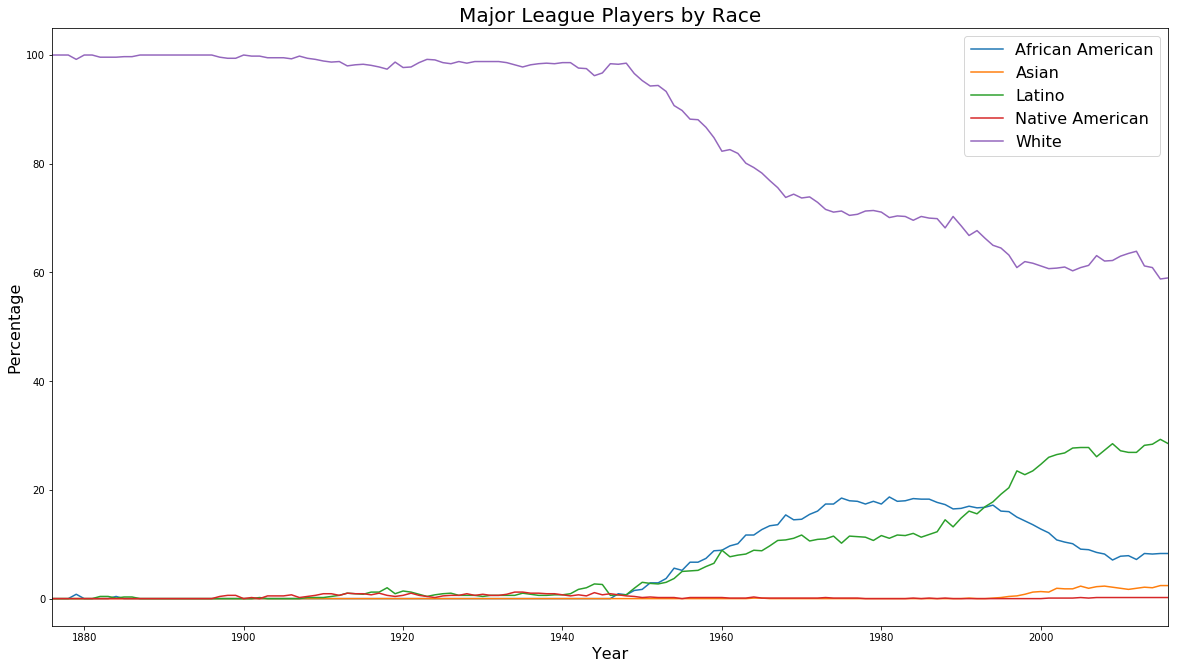

In [234]:
fig, ax = plt.subplots(figsize=(20,11))

RTable.plot(ax=ax)
ax.set_title('Major League Players by Race', fontsize=20,)
ax.legend(fontsize=16)
ax.set_ylabel('Percentage', fontsize=16)
ax.set_xlabel('Year', fontsize=16)

When we graph this, what immediately stands out is the steady decline of the percentage of white baseball players since integration in 1947 (although there were a few small dips during WWI and WWII). This shouldn't come as a surprise at all as it takes time for talent to develop and receive proper training within different cultures and so the percentage of white baseball players wasn't going to fall off a cliff.

What may come as a surprise to many is the decline of African American baseball players from it's peak in the late 1970s early 1980s. Unfortunately, there is no real good reason as to why this decline has occurred or why it has occurred so sharply. Many people attribute the globalization of the game as cause for a natural decline in African American participation (it is worth noting that the growth of Asian baseball players stem almost entirely from the international player pool) Others attribute the prioritization of alternative sports in inner-cities - namely football and basketball - as a driving force behind the decline of African American baseball players. Whatever the reason, it has been a rather precipitous drop in representation.

More than anything, this graph speaks to the rapid globalization in Major League Baseball beginning in the 1990s. We will see this more clearly in the next set of data I will show, but on this graph, you can begin to see the exponential growth of Latino baseball players, as well as the growth of Asian baseball players. This growth is almost entirely of international players and while Latino baseball players had been beforehand had been mostly from the United States or surrounding geographic areas (Cuba, Mexico, Puerto Rico, etc.). Today, the game has expanded so much to include players from more far reaching areas such as Brazil.

# MLB Birth Places

In [236]:
import pandas as pd
url = '/Users/dwoldar/Data_Bootcamp/Baseball Alamanc Data.xls'
bp = pd.read_excel(url)
bp

ID# DebutYear                                        Name  \
0      aardsda01     2000s                           DavidAllanAardsma   
1      aaronha01     1950s                             HenryLouisAaron   
2      aaronto01     1960s                              TommieLeeAaron   
3       aasedo01     1970s                           DonaldWilliamAase   
4       abadan01     2000s                            FaustoAndresAbad   
5       abadfe01     2010s                         FernandoAntonioAbad   
6      abbated01     1890s                      EdwardJamesAbbaticchio   
7      abbeybe01     1890s                               BertWoodAbbey   
8      abbeych01     1890s                              CharlesS.Abbey   
9      abbotda01     1890s                       LeanderFranklinAbbott   
10     abbotfr01     1900s                     HarryFrederickWinbigler   
11     abbotgl01     1970s                          WilliamGlennAbbott   
12     abbotje01     1990s                        JeffreyWilliamAbbott   
13     abbotji01     1980s                          JamesAnthonyAbbott   
14     abbotku01     1990s                            KurtThomasAbbott   
15     abbotky01     1990s                          LawrenceKyleAbbott   
16     abbotod01     1910s                              OdyCleonAbbott   
17     abbotpa01     1990s                             PaulDavidAbbott   
18      aberal01     1950s                            AlbertJuliusAber   
19     abercre01     2000s                 ReginaldDamascusAbercrombie   
20     abernbi01     1950s                     WilliamEdwardAbernathie   
21     abernbr01     2000s                       MichaelBrentAbernathy   
22     abernte01     1940s                  TalmadgeLafayetteAbernathy   
23     abernte02     1950s                       TheodoreWadeAbernathy   
24     abernwo01     1940s                      VirgilWoodrowAbernathy   
25     aberscl01     1940s                    CliffordAlexanderAberson   
26     ablesha01     1900s                           HarryTerrellAbles   
27     abnersh01     1980s                            ShawnWesleyAbner   
28     abramca01     1940s                            CalvinRossAbrams   
29     abramge01     1920s                           GeorgeAllenAbrams   
30     abregjo01     1980s                             JohnnyRayAbrego   
31     abreubo01     1990s                               BobKellyAbreu   
32     abreujo01     1940s                         JosephLawrenceAbreu   
33     abreujo02     2010s                      JosÌ©DarielAbreuCorrea   
34     abreuju01     2010s                      JuandeDios(Reyes)Abreu   
35     abreuto01     2000s                          EtanislaoToniAbreu   
36     abreuwi01     2000s                        WinstonLeonardoAbreu   
37     abstebi01     1900s                         WilliamHenryAbstein   
38     accarje01     2000s                            JeremyLeeAccardo   
39     aceveal01     2000s                               AlfredoAceves   
40     acevejo01     2000s                             JoseOmarAcevedo   
41     aceveju01     1990s                           JuanCarlosAcevedo   
42     achteaj01     2010s                            AdamJosephAchter   
43     ackerji01     1980s                            JamesJustinAcker   
44     ackerto01     1950s                            ThomasJamesAcker   
45     ackledu01     2010s                         DustinMichaelAckley   
46     acklefr01     1960s                      FlorianFrederickAckley   
47     acostcy01     1970s                      Cecilio(Miranda)Acosta   
48     acosted01     1970s                        EduardoElixbetAcosta   
49     acostjo01     1920s                                  JoseAcosta   
50     acostma01     2000s                         ManuelAlcidesAcosta   
51     acostme01     1910s              BaldomeroPedroAcostaFernÌÁndez   
52      acrema01     1990s                              MarkRobertAcre   
53     adairje01 

We don't need ID# or name, since we are only concerned with where everybody was born and when they debuted, so we remove these columns.

In [237]:
bp=bp.drop(['ID#','Name'], axis=1)
bp

DebutYear      BirthLocation
0         2000s           Colorado
1         1950s            Alabama
2         1960s            Alabama
3         1970s         California
4         2000s            Florida
5         2010s  DominicanRepublic
6         1890s       Pennsylvania
7         1890s            Vermont
8         1890s           Nebraska
9         1890s               Ohio
10        1900s               Ohio
11        1970s           Arkansas
12        1990s            Georgia
13        1980s           Michigan
14        1990s               Ohio
15        1990s      Massachusetts
16        1910s       Pennsylvania
17        1990s         California
18        1950s               Ohio
19        2000s            Georgia
20        1950s         California
21        2000s            Georgia
22        1940s      NorthCarolina
23        1950s      NorthCarolina
24        1940s      NorthCarolina
25        1940s           Illinois
26        1900s              Texas
27        1980s               Ohio
28        1940s       Pennsylvania
29        1920s         Washington
30        1980s              Texas
31        1990s          Venezuela
32        1940s         California
33        2010s               Cuba
34        2010s  DominicanRepublic
35        2000s  DominicanRepublic
36        2000s  DominicanRepublic
37        1900s           Missouri
38        2000s            Arizona
39        2000s             Mexico
40        2000s  DominicanRepublic
41        1990s             Mexico
42        2010s               Ohio
43        1980s              Texas
44        1950s          NewJersey
45        2010s      NorthCarolina
46        1960s          Wisconsin
47        1970s             Mexico
48        1970s             Panama
49        1920s               Cuba
50        2000s             Panama
51        1910s               Cuba
52        1990s         California
53        1950s           Oklahoma
54        1930s              Texas
55        2010s  DominicanRepublic
56        1940s         California
57        2010s            Alabama
58        1900s            Indiana
59        1910s              Texas
60        1920s      Massachusetts
61        1930s            Alabama
62        1940s         California
63        1970s       Pennsylvania
64        1930s           Colorado
65        1910s           Missouri
66        2010s            Florida
67        1940s         California
68        1960s          Wisconsin
69        1870s      Massachusetts
70        1970s      Massachusetts
71        1940s         California
72        1890s           Illinois
73        1900s           Illinois
74        1990s         California
75        1910s            Georgia
76        2010s           Oklahoma
77        2010s       Pennsylvania
78        1960s         California
79        1970s               Ohio
80        2000s              Texas
81        1940s         California
82        1900s              Texas
83        1980s         California
84        2000s      NorthCarolina
85        2010s          Louisiana
86        1920s       Pennsylvania
87        1920s               Utah
88        1990s            Alabama
89        1910s       Pennsylvania
90        1990s          NewMexico
91        1950s          Louisiana
92        2010s           Kentucky
93        1950s               Ohio
94        1980s           Illinois
95        2010s             Canada
96        1870s             Canada
97        2000s           Maryland
98        1930s      NorthCarolina
99        1940s             Kansas
100       1940s              Texas
101       1900s          Wisconsin
102       1920s           Arkansas
103       1890s           Missouri
104       2000s       WestVirginia
105       1990s           Illinois
106       2010s            NewYork
107       1960s         California
108       2010s          Venezuela
109       1980s         California
110       2000s            Arizona
111       1990s             Hawaii
112       1960s            Alabama
113       1950s 

We want to get rid of the s in the debut years and convert it into numbers so that we can graph the data. We will also want to change the column titles to Decade of Debut to make it a bit clearer as to what the numbers are showing. We may as well make Birth Location a cleaner title as well.

In [238]:
bp['DebutYear'] = bp['DebutYear'].str.replace('s', '').astype(int)

In [239]:
bp.columns = ["Decade of Debut", "Birth Location"]

In [240]:
bp.dtypes

Decade of Debut     int64
Birth Location     object
dtype: object

In [241]:
bp=bp.sort_values(['Birth Location'])
bp

Decade of Debut Birth Location
1905              1990    Afghanistan
7181              1930        Alabama
7030              1960        Alabama
14674             1990        Alabama
4743              1940        Alabama
7051              1940        Alabama
9557              1980        Alabama
358               1930        Alabama
17042             1920        Alabama
13120             1930        Alabama
14628             1930        Alabama
17073             1930        Alabama
4625              2000        Alabama
345               2010        Alabama
17115             1940        Alabama
8328              2010        Alabama
7093              1960        Alabama
13174             1930        Alabama
337               1990        Alabama
4589              1880        Alabama
11537             1960        Alabama
17167             1920        Alabama
17168             1910        Alabama
4532              1930        Alabama
7028              1940        Alabama
16965             1940        Alabama
2458              1910        Alabama
14727             2010        Alabama
6898              2010        Alabama
16807             1970        Alabama
9482              1950        Alabama
4883              1920        Alabama
4882              2010        Alabama
9483              1950        Alabama
16831             1920        Alabama
16851             1920        Alabama
11765             1990        Alabama
11752             1950        Alabama
7132              1950        Alabama
16877             2010        Alabama
9492              1980        Alabama
11731             1930        Alabama
13035             2000        Alabama
16891             1970        Alabama
16893             1980        Alabama
16895             1970        Alabama
11721             1980        Alabama
8404              1970        Alabama
16915             1980        Alabama
11700             1970        Alabama
13033             2000        Alabama
4497              2000        Alabama
11527             1940        Alabama
7180              1920        Alabama
13363             2000        Alabama
17566             1910        Alabama
14299             2000        Alabama
2370              2000        Alabama
11203             2000        Alabama
9824              2000        Alabama
11190             1990        Alabama
4064              1960        Alabama
1546              2000        Alabama
17653             2000        Alabama
8177              1970        Alabama
14290             2000        Alabama
17666             1920        Alabama
8176              1970        Alabama
9835              1950        Alabama
4017              2010        Alabama
17707             2010        Alabama
1554              1910        Alabama
11162             2010        Alabama
17734             2000        Alabama
3999              1990        Alabama
1557              1920        Alabama
926               1950        Alabama
11297             1970        Alabama
12971             1980        Alabama
8230              1960        Alabama
9749              1960        Alabama
8286              2010        Alabama
7194              1980        Alabama
9633              1940        Alabama
8280              1920        Alabama
1500              1920        Alabama
14521             1990        Alabama
8272              1980        Alabama
11455             2000        Alabama
1506              1950        Alabama
1507              1930        Alabama
14490             1920        Alabama
11403             1930        Alabama
2929              1950        Alabama
17372             1930        Alabama
17377             1960        Alabama
13291             2000        Alabama
14458             1930        Alabama
17391             1920        Alabama
17412             1990        Alabama
9732              1940        Alabama
4289              2010        Alabama
13313             2000        Alabama
7329              1990        Alabama
1115             

We want to check to make sure that each data point is entered correctly, so we take a look at each row.

In [242]:
print(bp.to_string())

       Decade of Debut     Birth Location
1905              1990        Afghanistan
7181              1930            Alabama
7030              1960            Alabama
14674             1990            Alabama
4743              1940            Alabama
7051              1940            Alabama
9557              1980            Alabama
358               1930            Alabama
17042             1920            Alabama
13120             1930            Alabama
14628             1930            Alabama
17073             1930            Alabama
4625              2000            Alabama
345               2010            Alabama
17115             1940            Alabama
8328              2010            Alabama
7093              1960            Alabama
13174             1930            Alabama
337               1990            Alabama
4589              1880            Alabama
11537             1960            Alabama
17167             1920            Alabama
17168             1910            

As you may notice, a few of the countries no longer exist, but rather than combining Austria-Hungary births with Austria, we are leaving these as different countries, since they were at the time of the players' births. Also, to avoid confusion, please note that nobody born from the country of Georgia has played in the Major Leagues... I checked. Also, please note that when I refer to countries, I am including commonwealths, kingdoms, territories, etc. in this list and using them synonymously with the term country for ease.

There is one player (index 3480) who is incorrectly labeled as born in "Virgin Island" not "Virgin Islands", as well as one player (index 2778) whose birth place is labeled as "maine" instead of "Maine" so we need to fix that.

In [243]:
bp.set_value(3480, 'Birth Location', 'VirginIslands')
bp.set_value(2778, 'Birth Location', 'Maine')

Decade of Debut Birth Location
1905              1990    Afghanistan
7181              1930        Alabama
7030              1960        Alabama
14674             1990        Alabama
4743              1940        Alabama
7051              1940        Alabama
9557              1980        Alabama
358               1930        Alabama
17042             1920        Alabama
13120             1930        Alabama
14628             1930        Alabama
17073             1930        Alabama
4625              2000        Alabama
345               2010        Alabama
17115             1940        Alabama
8328              2010        Alabama
7093              1960        Alabama
13174             1930        Alabama
337               1990        Alabama
4589              1880        Alabama
11537             1960        Alabama
17167             1920        Alabama
17168             1910        Alabama
4532              1930        Alabama
7028              1940        Alabama
16965             1940        Alabama
2458              1910        Alabama
14727             2010        Alabama
6898              2010        Alabama
16807             1970        Alabama
9482              1950        Alabama
4883              1920        Alabama
4882              2010        Alabama
9483              1950        Alabama
16831             1920        Alabama
16851             1920        Alabama
11765             1990        Alabama
11752             1950        Alabama
7132              1950        Alabama
16877             2010        Alabama
9492              1980        Alabama
11731             1930        Alabama
13035             2000        Alabama
16891             1970        Alabama
16893             1980        Alabama
16895             1970        Alabama
11721             1980        Alabama
8404              1970        Alabama
16915             1980        Alabama
11700             1970        Alabama
13033             2000        Alabama
4497              2000        Alabama
11527             1940        Alabama
7180              1920        Alabama
13363             2000        Alabama
17566             1910        Alabama
14299             2000        Alabama
2370              2000        Alabama
11203             2000        Alabama
9824              2000        Alabama
11190             1990        Alabama
4064              1960        Alabama
1546              2000        Alabama
17653             2000        Alabama
8177              1970        Alabama
14290             2000        Alabama
17666             1920        Alabama
8176              1970        Alabama
9835              1950        Alabama
4017              2010        Alabama
17707             2010        Alabama
1554              1910        Alabama
11162             2010        Alabama
17734             2000        Alabama
3999              1990        Alabama
1557              1920        Alabama
926               1950        Alabama
11297             1970        Alabama
12971             1980        Alabama
8230              1960        Alabama
9749              1960        Alabama
8286              2010        Alabama
7194              1980        Alabama
9633              1940        Alabama
8280              1920        Alabama
1500              1920        Alabama
14521             1990        Alabama
8272              1980        Alabama
11455             2000        Alabama
1506              1950        Alabama
1507              1930        Alabama
14490             1920        Alabama
11403             1930        Alabama
2929              1950        Alabama
17372             1930        Alabama
17377             1960        Alabama
13291             2000        Alabama
14458             1930        Alabama
17391             1920        Alabama
17412             1990        Alabama
9732              1940        Alabama
4289              2010        Alabama
13313             2000        Alabama
7329              1990        Alabama
1115             

In [244]:
bp=bp.sort_values(['Birth Location'])
bp

Decade of Debut Birth Location
1905              1990    Afghanistan
18292             1970        Alabama
13927             1980        Alabama
13567             1950        Alabama
112               1960        Alabama
18262             1920        Alabama
13551             1970        Alabama
3680              1910        Alabama
7706              1910        Alabama
8041              1980        Alabama
15625             1960        Alabama
17767             1920        Alabama
12921             1930        Alabama
16457             1990        Alabama
12879             1920        Alabama
8543              1990        Alabama
12874             1970        Alabama
3990              1990        Alabama
18293             1890        Alabama
18310             1920        Alabama
13919             2000        Alabama
18113             1930        Alabama
11011             1940        Alabama
9964              1910        Alabama
9963              1990        Alabama
3851              1950        Alabama
3854              1930        Alabama
166               1970        Alabama
18223             1950        Alabama
8056              1990        Alabama
1738              1940        Alabama
14214             2000        Alabama
88                1990        Alabama
13581             1920        Alabama
13917             2000        Alabama
7774              2010        Alabama
3568              2010        Alabama
10880             1950        Alabama
16402             1910        Alabama
962               2000        Alabama
16367             1960        Alabama
12035             1900        Alabama
11869             1910        Alabama
11870             1950        Alabama
16701             1990        Alabama
9435              1970        Alabama
1926              1900        Alabama
16685             1950        Alabama
16658             2010        Alabama
12963             2000        Alabama
6810              1980        Alabama
16631             1970        Alabama
2804              1940        Alabama
14875             1970        Alabama
786               1920        Alabama
16583             1930        Alabama
2800              1970        Alabama
14898             1920        Alabama
16632             1980        Alabama
12967             2010        Alabama
12929             1910        Alabama
11838             1980        Alabama
16338             1890        Alabama
16336             1900        Alabama
5277              1930        Alabama
5278              1930        Alabama
1388              2000        Alabama
6559              1910        Alabama
12826             1940        Alabama
498               1950        Alabama
2539              1940        Alabama
6525              1990        Alabama
6453              2010        Alabama
12121             1910        Alabama
6436              1920        Alabama
6427              1950        Alabama
16236             1940        Alabama
5180              1940        Alabama
16499             1960        Alabama
8545              1990        Alabama
13978             1940        Alabama
18119             1950        Alabama
10991             1970        Alabama
1784              2000        Alabama
18034             2010        Alabama
14100             1950        Alabama
17959             2010        Alabama
13926             1960        Alabama
7626              1970        Alabama
1592              2010        Alabama
1783              1940        Alabama
10352             1950        Alabama
7850              1950        Alabama
18470             1950        Alabama
3436              1990        Alabama
3134              1930        Alabama
10738             1960        Alabama
3132              1920        Alabama
13629             1920        Alabama
10727             1950        Alabama
195               1910        Alabama
11136             1940        Alabama
11123             1960        Alabama
1797              1960        Alabama
3912             

Because it's a small sample, we can go ahead and get rid of those players with a Birth Location listed as "unknown".

In [245]:
bp = bp[bp['Birth Location'] != 'Unknown']
bp = bp[bp['Birth Location'] != 'AtlanticOcean']
bp

Decade of Debut Birth Location
1905              1990    Afghanistan
18292             1970        Alabama
13927             1980        Alabama
13567             1950        Alabama
112               1960        Alabama
18262             1920        Alabama
13551             1970        Alabama
3680              1910        Alabama
7706              1910        Alabama
8041              1980        Alabama
15625             1960        Alabama
17767             1920        Alabama
12921             1930        Alabama
16457             1990        Alabama
12879             1920        Alabama
8543              1990        Alabama
12874             1970        Alabama
3990              1990        Alabama
18293             1890        Alabama
18310             1920        Alabama
13919             2000        Alabama
18113             1930        Alabama
11011             1940        Alabama
9964              1910        Alabama
9963              1990        Alabama
3851              1950        Alabama
3854              1930        Alabama
166               1970        Alabama
18223             1950        Alabama
8056              1990        Alabama
1738              1940        Alabama
14214             2000        Alabama
88                1990        Alabama
13581             1920        Alabama
13917             2000        Alabama
7774              2010        Alabama
3568              2010        Alabama
10880             1950        Alabama
16402             1910        Alabama
962               2000        Alabama
16367             1960        Alabama
12035             1900        Alabama
11869             1910        Alabama
11870             1950        Alabama
16701             1990        Alabama
9435              1970        Alabama
1926              1900        Alabama
16685             1950        Alabama
16658             2010        Alabama
12963             2000        Alabama
6810              1980        Alabama
16631             1970        Alabama
2804              1940        Alabama
14875             1970        Alabama
786               1920        Alabama
16583             1930        Alabama
2800              1970        Alabama
14898             1920        Alabama
16632             1980        Alabama
12967             2010        Alabama
12929             1910        Alabama
11838             1980        Alabama
16338             1890        Alabama
16336             1900        Alabama
5277              1930        Alabama
5278              1930        Alabama
1388              2000        Alabama
6559              1910        Alabama
12826             1940        Alabama
498               1950        Alabama
2539              1940        Alabama
6525              1990        Alabama
6453              2010        Alabama
12121             1910        Alabama
6436              1920        Alabama
6427              1950        Alabama
16236             1940        Alabama
5180              1940        Alabama
16499             1960        Alabama
8545              1990        Alabama
13978             1940        Alabama
18119             1950        Alabama
10991             1970        Alabama
1784              2000        Alabama
18034             2010        Alabama
14100             1950        Alabama
17959             2010        Alabama
13926             1960        Alabama
7626              1970        Alabama
1592              2010        Alabama
1783              1940        Alabama
10352             1950        Alabama
7850              1950        Alabama
18470             1950        Alabama
3436              1990        Alabama
3134              1930        Alabama
10738             1960        Alabama
3132              1920        Alabama
13629             1920        Alabama
10727             1950        Alabama
195               1910        Alabama
11136             1940        Alabama
11123             1960        Alabama
1797              1960        Alabama
3912             

We need to use the groupby function in order to get a hard number of the number of players born in a certain country who debuted in a certain year. For example, we can use groupby to determine how many players born in California debuted in 1876, 1877, 1878, etc.

In [246]:
x=bp.groupby(["Decade of Debut", "Birth Location"]).size().reset_index(name="Number of Players")
x

Decade of Debut     Birth Location  Number of Players
0               1870             Canada                  2
1               1870        Connecticut                  6
2               1870     Czechoslovakia                  1
3               1870               D.C.                  4
4               1870           Delaware                  1
5               1870            England                  6
6               1870            Georgia                  1
7               1870            Germany                  1
8               1870           Illinois                 10
9               1870            Indiana                  2
10              1870               Iowa                  2
11              1870            Ireland                  9
12              1870           Kentucky                  6
13              1870          Louisiana                  2
14              1870              Maine                  4
15              1870           Maryland                  4
16              1870      Massachusetts                 22
17              1870           Michigan                  2
18              1870           Missouri                 12
19              1870       NewHampshire                  1
20              1870          NewJersey                 12
21              1870            NewYork                 63
22              1870      NorthCarolina                  1
23              1870               Ohio                 10
24              1870       Pennsylvania                 44
25              1870        RhodeIsland                  4
26              1870           Scotland                  1
27              1870      SouthCarolina                  1
28              1870           Virginia                  1
29              1870       WestVirginia                  2
30              1870          Wisconsin                  1
31              1880            Alabama                  1
32              1880           Arkansas                  1
33              1880          Australia                  1
34              1880         California                 20
35              1880             Canada                 39
36              1880        Connecticut                 24
37              1880               D.C.                 19
38              1880           Delaware                  6
39              1880            England                  4
40              1880            Georgia                  1
41              1880            Germany                  5
42              1880           Illinois                 61
43              1880            Indiana                 16
44              1880               Iowa                  9
45              1880            Ireland                 19
46              1880             Kansas                  1
47              1880           Kentucky                 35
48              1880          Louisiana                 11
49              1880              Maine                  7
50              1880           Maryland                 25
51              1880      Massachusetts                 97
52              1880           Michigan                 12
53              1880          Minnesota                  7
54              1880        Mississippi                  1
55              1880           Missouri                 45
56              1880       NewHampshire                  6
57              1880          NewJersey                 17
58              1880            NewYork                124
59              1880               Ohio                 79
60              1880       Pennsylvania                173
61              1880        RhodeIsland                 14
62              1880           Scotland                  2
63              1880             Sweden                  1
64              1880          Tennessee                  4
65              1880              Texas                  1
66              1880            Vermont             

In [247]:
bp1 = x.set_index(['Decade of Debut', 'Birth Location'])
bp1

Number of Players
Decade of Debut Birth Location                      
1870            Canada                             2
                Connecticut                        6
                Czechoslovakia                     1
                D.C.                               4
                Delaware                           1
                England                            6
                Georgia                            1
                Germany                            1
                Illinois                          10
                Indiana                            2
                Iowa                               2
                Ireland                            9
                Kentucky                           6
                Louisiana                          2
                Maine                              4
                Maryland                           4
                Massachusetts                     22
                Michigan                           2
                Missouri                          12
                NewHampshire                       1
                NewJersey                         12
                NewYork                           63
                NorthCarolina                      1
                Ohio                              10
                Pennsylvania                      44
                RhodeIsland                        4
                Scotland                           1
                SouthCarolina                      1
                Virginia                           1
                WestVirginia                       2
                Wisconsin                          1
1880            Alabama                            1
                Arkansas                           1
                Australia                          1
                California                        20
                Canada                            39
                Connecticut                       24
                D.C.                              19
                Delaware                           6
                England                            4
                Georgia                            1
                Germany                            5
                Illinois                          61
                Indiana                           16
                Iowa                               9
                Ireland                           19
                Kansas                             1
                Kentucky                          35
                Louisiana                         11
                Maine                              7
                Maryland                          25
                Massachusetts                     97
                Michigan                          12
                Minnesota                          7
                Mississippi                        1
                Missouri                          45
                NewHampshire                       6
                NewJersey                         17
                NewYork                          124
                Ohio                              79
                Pennsylvania                     173
                RhodeIsland                       14
                Scotland                           2
                Sweden                             1
                Tennessee                          4
                Texas                              1
                Vermont                            7
                Virginia                          11
                Wales                              1
                WestVirginia                       5
                Wisconsin                         15
1890            Alabama                            3
                Arkansas                           1
                California                        15
       

It may be more helpful if we can see everything in the table.

In [248]:
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
bp1

Number of Players
Decade of Debut Birth Location                      
1870            Canada                             2
                Connecticut                        6
                Czechoslovakia                     1
                D.C.                               4
                Delaware                           1
                England                            6
                Georgia                            1
                Germany                            1
                Illinois                          10
                Indiana                            2
                Iowa                               2
                Ireland                            9
                Kentucky                           6
                Louisiana                          2
                Maine                              4
                Maryland                           4
                Massachusetts                     22
                Michigan                           2
                Missouri                          12
                NewHampshire                       1
                NewJersey                         12
                NewYork                           63
                NorthCarolina                      1
                Ohio                              10
                Pennsylvania                      44
                RhodeIsland                        4
                Scotland                           1
                SouthCarolina                      1
                Virginia                           1
                WestVirginia                       2
                Wisconsin                          1
1880            Alabama                            1
                Arkansas                           1
                Australia                          1
                California                        20
                Canada                            39
                Connecticut                       24
                D.C.                              19
                Delaware                           6
                England                            4
                Georgia                            1
                Germany                            5
                Illinois                          61
                Indiana                           16
                Iowa                               9
                Ireland                           19
                Kansas                             1
                Kentucky                          35
                Louisiana                         11
                Maine                              7
                Maryland                          25
                Massachusetts                     97
                Michigan                          12
                Minnesota                          7
                Mississippi                        1
                Missouri                          45
                NewHampshire                       6
                NewJersey                         17
                NewYork                          124
                Ohio                              79
                Pennsylvania                     173
                RhodeIsland                       14
                Scotland                           2
                Sweden                             1
                Tennessee                          4
                Texas                              1
                Vermont                            7
                Virginia                          11
                Wales                              1
                WestVirginia                       5
                Wisconsin                         15
1890            Alabama                            3
                Arkansas                           1
                California                        15
       

And if we want to be able to see how the number of players born at each location has changed over the decades, we can sort the table to show that to us more clearly.

In [249]:
bp2=x.sort_values(['Birth Location', 'Decade of Debut'])
bp2

Decade of Debut     Birth Location  Number of Players
669             1990        Afghanistan                  1
31              1880            Alabama                  1
71              1890            Alabama                  3
117             1900            Alabama                  5
172             1910            Alabama                 18
233             1920            Alabama                 36
290             1930            Alabama                 30
347             1940            Alabama                 33
406             1950            Alabama                 33
467             1960            Alabama                 30
530             1970            Alabama                 32
598             1980            Alabama                 23
670             1990            Alabama                 25
744             2000            Alabama                 32
818             2010            Alabama                 26
234             1920             Alaska                  1
531             1970             Alaska                  1
599             1980             Alaska                  3
745             2000             Alaska                  6
819             2010             Alaska                  1
468             1960      AmericanSamoa                  1
173             1910            Arizona                  1
235             1920            Arizona                  2
291             1930            Arizona                  2
348             1940            Arizona                  5
407             1950            Arizona                  3
469             1960            Arizona                  6
532             1970            Arizona                  9
600             1980            Arizona                 13
671             1990            Arizona                 14
746             2000            Arizona                 31
820             2010            Arizona                 16
32              1880           Arkansas                  1
72              1890           Arkansas                  1
118             1900           Arkansas                  4
174             1910           Arkansas                 14
236             1920           Arkansas                 18
292             1930           Arkansas                 16
349             1940           Arkansas                 21
408             1950           Arkansas                 16
470             1960           Arkansas                 19
533             1970           Arkansas                  9
601             1980           Arkansas                  8
672             1990           Arkansas                 10
747             2000           Arkansas                 11
821             2010           Arkansas                  6
673             1990              Aruba                  4
822             2010              Aruba                  1
33              1880          Australia                  1
602             1980          Australia                  1
674             1990          Australia                  7
748             2000          Australia                 15
823             2010          Australia                  6
350             1940            Austria                  1
119             1900    Austria-Hungary                  3
175             1910    Austria-Hungary                  1
409             1950            Bahamas                  1
471             1960            Bahamas                  1
534             1970            Bahamas                  2
603             1980            Bahamas                  1
824             2010            Bahamas                  1
675             1990            Belgium                  1
825             2010             Brazil                  3
676             1990    BritishHonduras                  1
34              1880         California                 20
73              1890         California                 15
120             1900         California             

This is still a lot of data and we may want to better visualize the table so that we see how each specific location has changed over time.

In [250]:
bp3 = x.pivot(index='Decade of Debut', columns='Birth Location', values='Number of Players')
bp3.fillna(0, inplace=True)
bp3

Birth Location   Afghanistan  Alabama  Alaska  AmericanSamoa  Arizona  \
Decade of Debut                                                         
1870                     0.0      0.0     0.0            0.0      0.0   
1880                     0.0      1.0     0.0            0.0      0.0   
1890                     0.0      3.0     0.0            0.0      0.0   
1900                     0.0      5.0     0.0            0.0      0.0   
1910                     0.0     18.0     0.0            0.0      1.0   
1920                     0.0     36.0     1.0            0.0      2.0   
1930                     0.0     30.0     0.0            0.0      2.0   
1940                     0.0     33.0     0.0            0.0      5.0   
1950                     0.0     33.0     0.0            0.0      3.0   
1960                     0.0     30.0     0.0            1.0      6.0   
1970                     0.0     32.0     1.0            0.0      9.0   
1980                     0.0     23.0     3.0            0.0     13.0   
1990                     1.0     25.0     0.0            0.0     14.0   
2000                     0.0     32.0     6.0            0.0     31.0   
2010                     0.0     26.0     1.0            0.0     16.0   

Birth Location   Arkansas  Aruba  Australia  Austria  Austria-Hungary  \
Decade of Debut                                                         
1870                  0.0    0.0        0.0      0.0              0.0   
1880                  1.0    0.0        1.0      0.0              0.0   
1890                  1.0    0.0        0.0      0.0              0.0   
1900                  4.0    0.0        0.0      0.0              3.0   
1910                 14.0    0.0        0.0      0.0              1.0   
1920                 18.0    0.0        0.0      0.0              0.0   
1930                 16.0    0.0        0.0      0.0              0.0   
1940                 21.0    0.0        0.0      1.0              0.0   
1950                 16.0    0.0        0.0      0.0              0.0   
1960                 19.0    0.0        0.0      0.0              0.0   
1970                  9.0    0.0        0.0      0.0              0.0   
1980                  8.0    0.0        1.0      0.0              0.0   
1990                 10.0    4.0        7.0      0.0              0.0   
2000                 11.0    0.0       15.0      0.0              0.0   
2010                  6.0    1.0        6.0      0.0              0.0   

Birth Location   Bahamas  Belgium  Brazil  BritishHonduras  California  \
Decade of Debut                                                          
1870                 0.0      0.0     0.0              0.0         0.0   
1880                 0.0      0.0     0.0              0.0        20.0   
1890                 0.0      0.0     0.0              0.0        15.0   
1900                 0.0      0.0     0.0              0.0        32.0   
1910                 0.0      0.0     0.0              0.0        58.0   
1920                 0.0      0.0     0.0              0.0        69.0   
1930                 0.0      0.0     0.0              0.0       103.0   
1940                 0.0      0.0     0.0              0.0        95.0   
1950                 1.0      0.0     0.0              0.0       100.0   
1960                 1.0      0.0     0.0              0.0       189.0   
1970                 2.0      0.0     0.0              0.0       272.0   
1980                 1.0      0.0     0.0              0.0       316.0   
1990                 0.0      1.0     0.0              1.0       327.0   
2000                 0.0      0.0     0.0              0.0       335.0   
2010                 1.0      0.0     3.0              0.0       252.0   

Birth Location   Canada  CanaryIslands  China  Colombia  Colorado  \
Decade of Debut                                                     
1870                2.0            0.0    0.0       0.0       0.0   
1880               39.0            0.0    0.0     

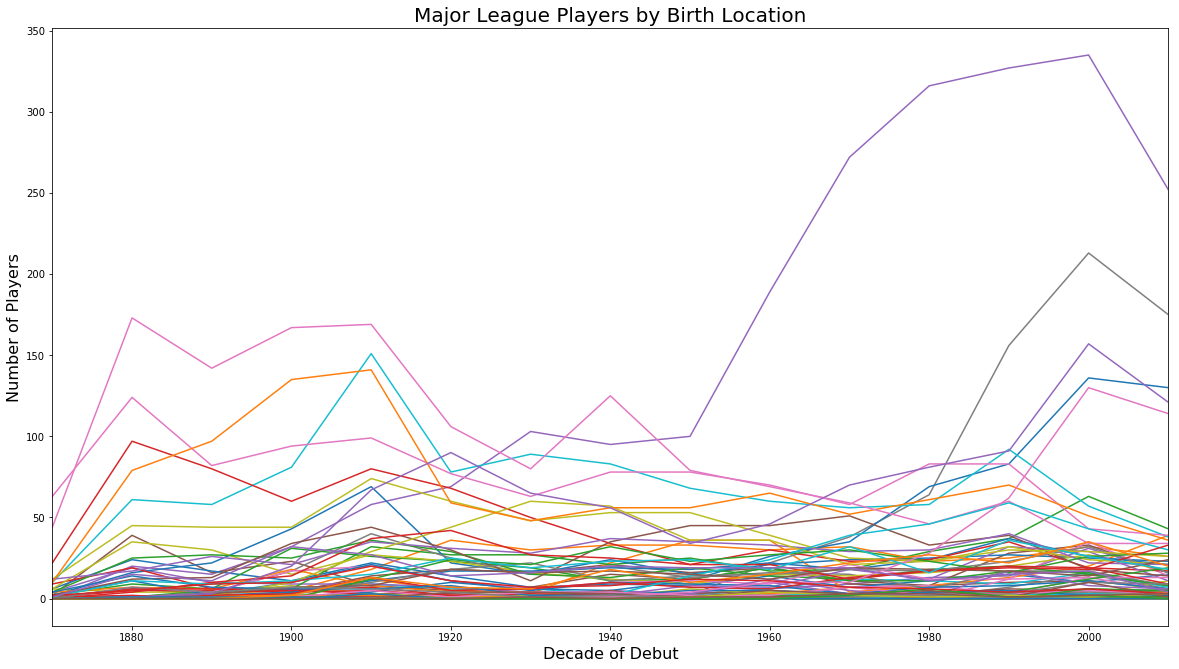

In [254]:
fig, ax = plt.subplots(figsize=(20,11))

bp3.plot(ax=ax)
ax.set_title('Major League Players by Birth Location', fontsize=20,)
ax.legend_.remove()
ax.set_ylabel('Number of Players', fontsize=16)
ax.set_xlabel('Decade of Debut', fontsize=16)

This is very messy, so let's see if we can isolate US and International data here. It is also worth noting that we see what looks to be a dip in players over the past decade. This is not entirely the case since there are three more years in this current decade. Note that the US moving forward only includes the 50 states and Washington D.C. whereas International includes all U.S. territories, etc.

In [255]:
US = bp3.drop(['Afghanistan','AmericanSamoa', 'Aruba', 'Australia', 'Austria', 'Austria-Hungary', 'Bahamas', 'Belgium', 'Brazil', 'BritishHonduras', 'Canada', 'CanaryIslands', 'China', 'Colombia', 'Cuba', 'Curacao', 'Czechoslovakia', 'Denmark', 'DominicanRepublic', 'England', 'Finland', 'France', 'Germany', 'Greece', 'Guam', 'Honduras', 'Indonesia', 'Ireland', 'Italy', 'Japan', 'Jamaica', 'Lithuania', 'Mexico', 'Netherlands', 'Nicaragua', 'Norway', 'Panama', 'PanamaCanalZone', 'Philippines', 'Poland', 'PuertoRico', 'Russia', 'SaudiArabia', 'Scotland', 'Singapore', 'SouthKorea', 'SouthVietnam', 'Spain', 'Sweden', 'Switzerland', 'Taiwan', 'Venezuela', 'VirginIslands', 'Wales', 'WestGermany'], axis=1)
US

Birth Location   Alabama  Alaska  Arizona  Arkansas  California  Colorado  \
Decade of Debut                                                             
1870                 0.0     0.0      0.0       0.0         0.0       0.0   
1880                 1.0     0.0      0.0       1.0        20.0       0.0   
1890                 3.0     0.0      0.0       1.0        15.0       2.0   
1900                 5.0     0.0      0.0       4.0        32.0       3.0   
1910                18.0     0.0      1.0      14.0        58.0       9.0   
1920                36.0     1.0      2.0      18.0        69.0       6.0   
1930                30.0     0.0      2.0      16.0       103.0       6.0   
1940                33.0     0.0      5.0      21.0        95.0       3.0   
1950                33.0     0.0      3.0      16.0       100.0       2.0   
1960                30.0     0.0      6.0      19.0       189.0       6.0   
1970                32.0     1.0      9.0       9.0       272.0      12.0   
1980                23.0     3.0     13.0       8.0       316.0      11.0   
1990                25.0     0.0     14.0      10.0       327.0       9.0   
2000                32.0     6.0     31.0      11.0       335.0      16.0   
2010                26.0     1.0     16.0       6.0       252.0       7.0   

Birth Location   Connecticut  D.C.  Delaware  Florida  Georgia  Hawaii  Idaho  \
Decade of Debut                                                                 
1870                     6.0   4.0       1.0      0.0      1.0     0.0    0.0   
1880                    24.0  19.0       6.0      0.0      1.0     0.0    0.0   
1890                    17.0  10.0       3.0      0.0      5.0     0.0    0.0   
1900                    11.0   9.0       6.0      1.0      6.0     0.0    2.0   
1910                    22.0   9.0       3.0      4.0     32.0     1.0    2.0   
1920                    14.0   7.0       3.0     10.0     27.0     1.0    1.0   
1930                     7.0   4.0       2.0      6.0     27.0     2.0    1.0   
1940                     9.0   4.0       1.0      5.0     21.0     0.0    1.0   
1950                     8.0   3.0       3.0     11.0     25.0     0.0    6.0   
1960                    14.0  10.0       5.0     26.0     17.0     1.0    3.0   
1970                     7.0   3.0       2.0     35.0     18.0     7.0    1.0   
1980                    11.0   3.0       3.0     69.0     29.0     8.0    4.0   
1990                    15.0   1.0       6.0     83.0     37.0     3.0    2.0   
2000                    10.0   5.0       5.0    136.0     63.0    13.0    3.0   
2010                    15.0   5.0       5.0    130.0     43.0     5.0    4.0   

Birth Location   Illinois  Indiana  Iowa  Kansas  Kentucky  Louisiana  Maine  \
Decade of Debut                                                                
1870                 10.0      2.0   2.0     0.0       6.0        2.0    4.0   
1880                 61.0     16.0   9.0     1.0      35.0       11.0    7.0   
1890                 58.0     22.0   6.0     4.0      30.0        2.0    6.0   
1900                 81.0     43.0  31.0    17.0      15.0        4.0   18.0   
1910                151.0     69.0  26.0    40.0      27.0       11.0    8.0   
1920                 78.0     22.0  23.0    25.0      23.0       17.0    4.0   
1930                 89.0     15.0  19.0    15.0      16.0       17.0    4.0   
1940                 83.0     24.0  11.0    20.0      12.0       19.0    2.0   
1950                 68.0     15.0  12.0    13.0       9.0       18.0    1.0   
1960                 60.0     21.0  19.0    16.0      15.0       22.0    3.0   
1970                 56.0     24.0  11.0    15.0      14.0       18.0    7.0   
1980                 58.0     25.0  11.0     6.0      16.0       24.0    3.0   
1990                 92.0     27.0  17.0    17.0      20.0       37.0    1.0   
2000                 57.0     25.0  16.0    17.0      27.0       26.0    2.0   
2010                 38.0     23

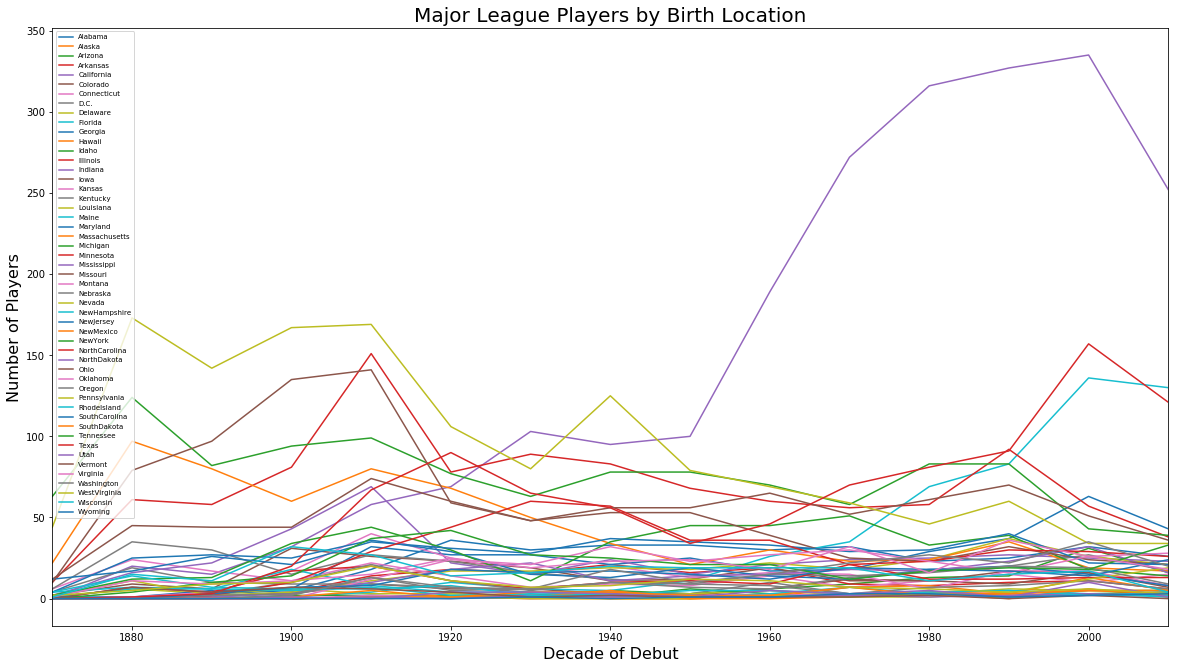

In [256]:
fig, ax = plt.subplots(figsize=(20,11))

US.plot(ax=ax)
ax.set_title('Major League Players by Birth Location', fontsize=20,)
ax.legend(fontsize=7)
ax.set_ylabel('Number of Players', fontsize=16)
ax.set_xlabel('Decade of Debut', fontsize=16)

This is still a bit messy, but we see in the graph, the same thing we could have noticed in the table. The majority of US-born baseball players come from only about a handful of states. Let's isolate those popular states so that we can really see any trends here. If we compare it to the demographic data, perhaps we can find something linking demographic shifts with geographic shifts domestically.

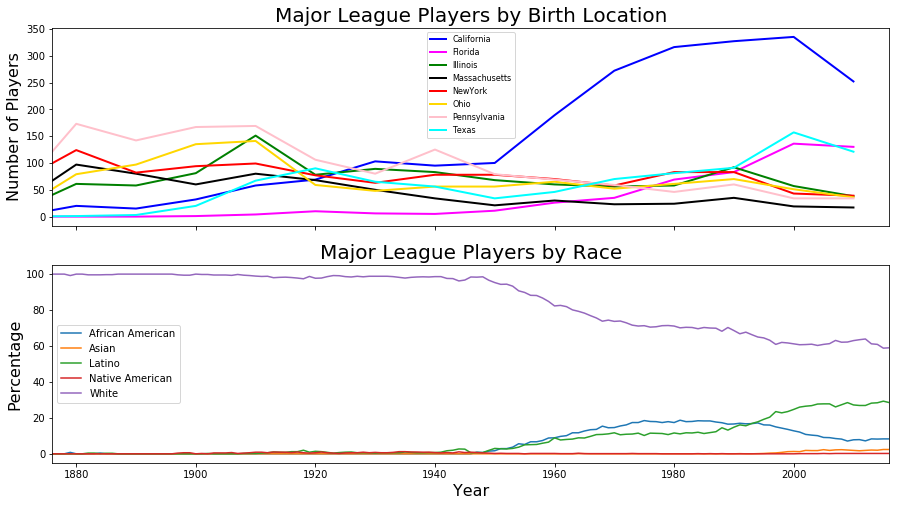

In [257]:
fig, ax = plt.subplots(figsize=(15,8), nrows=2, ncols=1, sharex=True)

US[['California','Florida', 'Illinois', 'Massachusetts', 'NewYork', 'Ohio', 'Pennsylvania', 'Texas']].plot(ax=ax[0],
                                                                                                          color=['blue', 'magenta', 'green', 'black', 'red', 'gold', 'pink', 'aqua'],
                                                                                                          linewidth=2.0)
ax[0].set_title('Major League Players by Birth Location', fontsize=20)
ax[0].legend(fontsize=8, loc='best')
ax[0].set_ylabel('Number of Players', fontsize=16)
ax[0].set_xlabel('Decade of Debut', fontsize=16)
RTable.plot(ax=ax[1])
ax[1].set_title('Major League Players by Race', fontsize=20,)
ax[1].legend(fontsize=10)
ax[1].set_ylabel('Percentage', fontsize=16)
ax[1].set_xlabel('Year', fontsize=16)

Immediately, we notice the rapid growth of MLB players from California once the color barrier was removed. We also see a less steep, but still significant rise of players from Florida, as well as Texas. These areas don't particularly help to explain the rise in African Americans, but they do help to show that the increase of Hispanic baseball players occurred both internationally as well as domestically. It therefore should not be surprising that as baseball became more diverse, we see a large growth in players from these states. 

Now let's look internationally:

In [258]:
International = bp3.drop(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado', 'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada', 'NewHampshire', 'NewJersey', 'NewMexico', 'NewYork', 'NorthCarolina', 'SouthCarolina', 'NorthDakota', 'SouthDakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania', 'RhodeIsland', 'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'WestVirginia', 'Washington', 'Wisconsin', 'Wyoming', 'D.C.'], axis=1)
International

Birth Location   Afghanistan  AmericanSamoa  Aruba  Australia  Austria  \
Decade of Debut                                                          
1870                     0.0            0.0    0.0        0.0      0.0   
1880                     0.0            0.0    0.0        1.0      0.0   
1890                     0.0            0.0    0.0        0.0      0.0   
1900                     0.0            0.0    0.0        0.0      0.0   
1910                     0.0            0.0    0.0        0.0      0.0   
1920                     0.0            0.0    0.0        0.0      0.0   
1930                     0.0            0.0    0.0        0.0      0.0   
1940                     0.0            0.0    0.0        0.0      1.0   
1950                     0.0            0.0    0.0        0.0      0.0   
1960                     0.0            1.0    0.0        0.0      0.0   
1970                     0.0            0.0    0.0        0.0      0.0   
1980                     0.0            0.0    0.0        1.0      0.0   
1990                     1.0            0.0    4.0        7.0      0.0   
2000                     0.0            0.0    0.0       15.0      0.0   
2010                     0.0            0.0    1.0        6.0      0.0   

Birth Location   Austria-Hungary  Bahamas  Belgium  Brazil  BritishHonduras  \
Decade of Debut                                                               
1870                         0.0      0.0      0.0     0.0              0.0   
1880                         0.0      0.0      0.0     0.0              0.0   
1890                         0.0      0.0      0.0     0.0              0.0   
1900                         3.0      0.0      0.0     0.0              0.0   
1910                         1.0      0.0      0.0     0.0              0.0   
1920                         0.0      0.0      0.0     0.0              0.0   
1930                         0.0      0.0      0.0     0.0              0.0   
1940                         0.0      0.0      0.0     0.0              0.0   
1950                         0.0      1.0      0.0     0.0              0.0   
1960                         0.0      1.0      0.0     0.0              0.0   
1970                         0.0      2.0      0.0     0.0              0.0   
1980                         0.0      1.0      0.0     0.0              0.0   
1990                         0.0      0.0      1.0     0.0              1.0   
2000                         0.0      0.0      0.0     0.0              0.0   
2010                         0.0      1.0      0.0     3.0              0.0   

Birth Location   Canada  CanaryIslands  China  Colombia  Cuba  Curacao  \
Decade of Debut                                                          
1870                2.0            0.0    0.0       0.0   0.0      0.0   
1880               39.0            0.0    0.0       0.0   0.0      0.0   
1890               16.0            0.0    0.0       0.0   0.0      0.0   
1900               23.0            0.0    0.0       1.0   0.0      0.0   
1910                8.0            1.0    1.0       0.0  12.0      0.0   
1920                5.0            0.0    0.0       0.0   5.0      0.0   
1930                7.0            0.0    0.0       0.0   3.0      0.0   
1940               15.0            0.0    0.0       0.0  22.0      0.0   
1950               12.0            0.0    0.0       0.0  36.0      0.0   
1960               19.0            0.0    0.0       0.0  36.0      0.0   
1970               11.0            0.0    0.0       1.0   4.0      0.0   
1980                8.0            0.0    0.0       1.0   8.0      1.0   
1990               28.0            0.0    0.0       4.0  13.0      3.0   
2000               33.0            0.0    0.0       2.0  20.0      6.0   
2010               16.0            0.0    1.0      11.0  39.0      4.0   

Birth Location   Czechoslovakia  Denmark  DominicanRepublic  England  Finland  \
Decade of Debut                                          

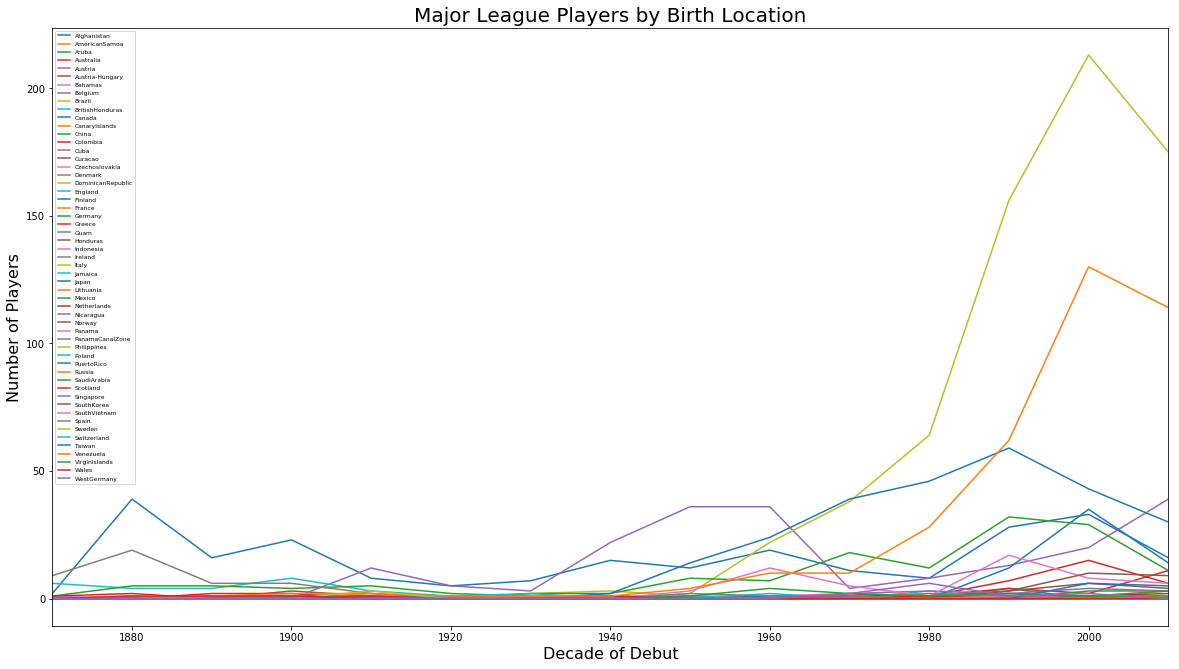

In [259]:
fig, ax = plt.subplots(figsize=(20,11))

International.plot(ax=ax)
ax.set_title('Major League Players by Birth Location', fontsize=20,)
ax.legend(fontsize=6)
ax.set_ylabel('Number of Players', fontsize=16)
ax.set_xlabel('Decade of Debut', fontsize=16)

There are a number of things that are very interesting here. The first is that the large spikes in international players should correspond well with the demographics of Major League Baseball. To see this, let's isolate the largest countries and compare it to the changing demographics in Major League Baseball. That being said, this is actually messier than the state data because there are more countries than states in which baseball players hail from. Just looking at the graph (or table), you can notice how many more countries players come from today than say 100 years ago.

Let's isolate the largest countries and compare this to the demographic data so that we can dive deeper into any trends here.

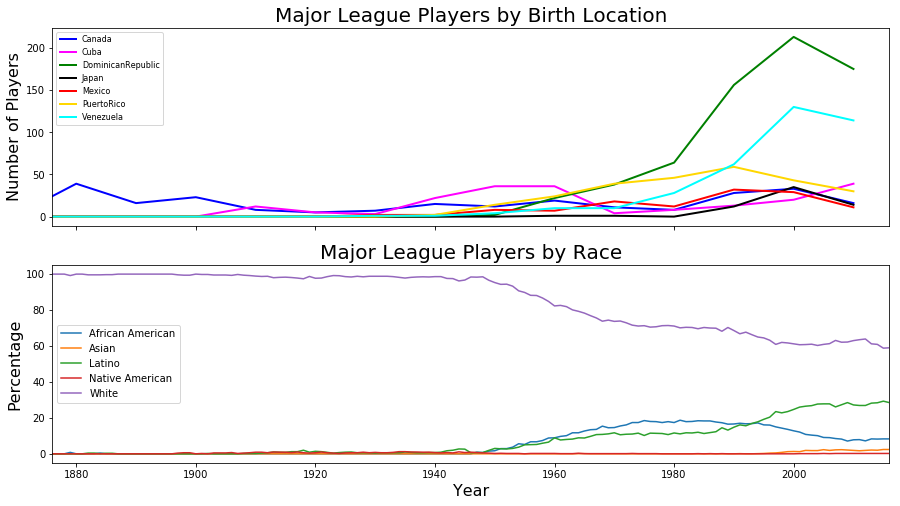

In [260]:
fig, ax = plt.subplots(figsize=(15,8), nrows=2, ncols=1, sharex=True)

International[['Canada','Cuba', 'DominicanRepublic', 'Japan', 'Mexico', 'PuertoRico', 'Venezuela']].plot(ax=ax[0],
                                                                                                          color=['blue', 'magenta', 'green', 'black', 'red', 'gold', 'aqua'],
                                                                                                          linewidth=2.0)
ax[0].set_title('Major League Players by Birth Location', fontsize=20)
ax[0].legend(fontsize=8, loc='best')
ax[0].set_ylabel('Number of Players', fontsize=16)
ax[0].set_xlabel('Decade of Debut', fontsize=16)
RTable.plot(ax=ax[1])
ax[1].set_title('Major League Players by Race', fontsize=20,)
ax[1].legend(fontsize=10)
ax[1].set_ylabel('Percentage', fontsize=16)
ax[1].set_xlabel('Year', fontsize=16)

We notice again that the globalization in the game is directly correlated to the increased diversity of the game. This chart also shows some interesting notions. The boom of Hispanic players seems to come from different countries at different times. For example, we see the initial growth of Hispanic players comes from Cuba, before drying up once we severed diplomatic ties with the country. The growth was then carried by the Dominican Republic and Puerto Rico - however, the real boom of Hispanic players seems to come more from the explosive growth of Venezuelan players, coupled with a recent reimmergence of Cuban players.

Next, let's take this data and isolate it by continent to show how more macro trends are showing through in the game. For example, when we take a look at the below, we can get a better idea of where the global growth of baseball is coming from. I am not including the US in this data, because it is meant to look at the global scope of the game.

In [261]:
NORTH_AMERICA = International['Aruba']+International['Bahamas']+International['BritishHonduras']+International['Canada']+International['Cuba']+International['DominicanRepublic']+International['Honduras']+International['Jamaica']+International['Mexico']+International['Nicaragua']+International['Panama']+International['PanamaCanalZone']+International['PuertoRico']+International['VirginIslands']
SOUTH_AMERICA = International['Brazil']+International['Colombia']+International['Curacao']+International['Venezuela']
ASIA = International['Afghanistan']+International['China']+International['Indonesia']+International['Japan']+International['Philippines']+International['SaudiArabia']+International['Singapore']+International['SouthKorea']+International['SouthVietnam']+International['Taiwan']
EUROPE = International['Austria-Hungary']+International['Belgium']+International['CanaryIslands']+International['Czechoslovakia']+International['Denmark']+International['England']+International['Finland']+International['France']+International['Germany']+International['Greece']+International['Ireland']+International['Italy']+International['Lithuania']+International['Netherlands']+International['Norway']+International['Poland']+International['Russia']+International['Scotland']+International['Spain']+International['Sweden']+International['Switzerland']+International['Wales']+International['WestGermany']
AFRICA = 0.0
OCEANIA = International['AmericanSamoa']+International['Australia']+International['Guam']
IntCont=pd.DataFrame({'North America': NORTH_AMERICA, 'South America': SOUTH_AMERICA, 'Asia': ASIA, 'Europe': EUROPE, 'Africa': AFRICA, 'Oceania': OCEANIA})
IntCont

Africa  Asia  Europe  North America  Oceania  South America
Decade of Debut                                                             
1870                0.0   0.0    18.0            2.0      0.0            0.0
1880                0.0   0.0    32.0           39.0      1.0            0.0
1890                0.0   0.0    21.0           16.0      0.0            0.0
1900                0.0   0.0    30.0           23.0      0.0            1.0
1910                0.0   1.0    21.0           20.0      0.0            0.0
1920                0.0   0.0     7.0           10.0      0.0            0.0
1930                0.0   0.0     7.0           12.0      0.0            1.0
1940                0.0   0.0     8.0           41.0      0.0            1.0
1950                0.0   0.0     4.0           79.0      0.0            4.0
1960                0.0   1.0     2.0          126.0      1.0           10.0
1970                0.0   1.0     6.0          122.0      0.0           11.0
1980                0.0   0.0    12.0          148.0      1.0           30.0
1990                0.0  19.0     8.0          314.0      7.0           69.0
2000                0.0  53.0     7.0          352.0     16.0          138.0
2010                0.0  30.0     7.0          285.0      6.0          132.0

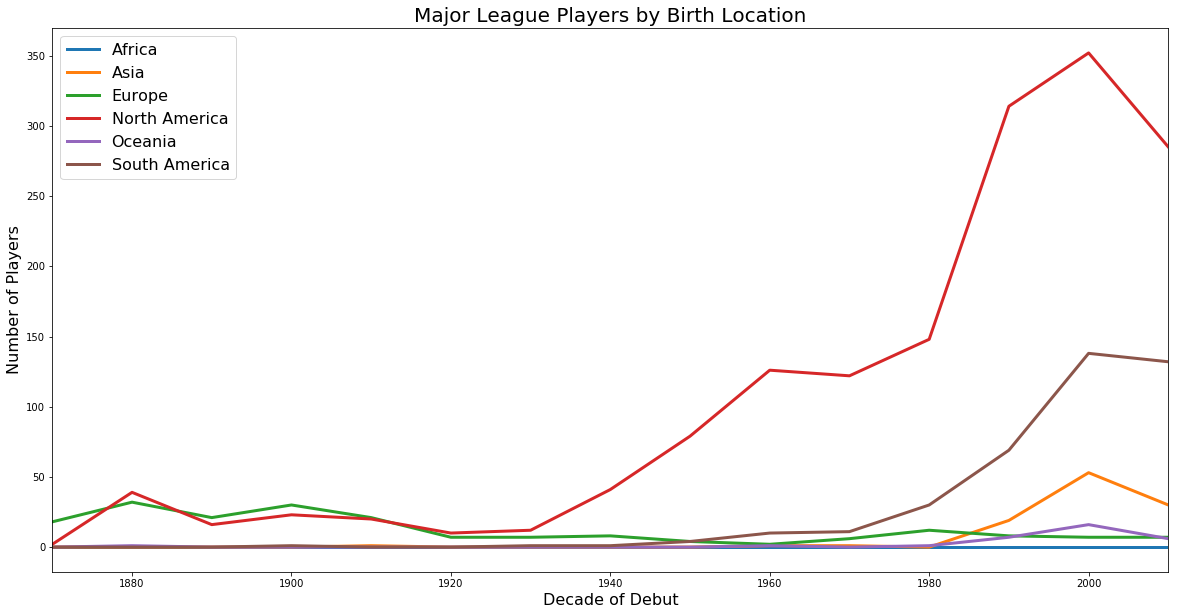

In [262]:
fig, ax = plt.subplots(figsize=(20,10))

IntCont.plot(ax=ax, linewidth=3.0)
ax.set_title('Major League Players by Birth Location', fontsize=20,)
ax.legend(fontsize=16)
ax.set_ylabel('Number of Players', fontsize=16)
ax.set_xlabel('Decade of Debut', fontsize=16)

So while baseball has become more diverse since the color barrier, the growth seems to have been driven largely by geographic proximity to the US. It wasn't until the 1980s that the game started to really became a global game. At that point, South American players started to filter into the league, followed by Asian players and even a handful of players from the Oceania region. At the same time, European players have steadily decreased, although this is a bit misleading. This graph charts place of birth, so the roughly 40 players from Europe that played during the late 19th century were most likely born in Europe and immigrated over to the states at a young age during the numerous waves of European immigration. If we accept that, then it would appear as though baseball has not really expanded much into Europe.

Finally, let's compare international players to US-Born players and compare this to Major League Demographics.

In [263]:
USTotal = US.sum(axis=1)
InternationalTotal = International.sum(axis=1)
Total=pd.DataFrame({'US Total': USTotal, 'International Total':InternationalTotal})
Total

International Total  US Total
Decade of Debut                               
1870                            20.0     218.0
1880                            72.0     855.0
1890                            37.0     769.0
1900                            54.0    1027.0
1910                            42.0    1504.0
1920                            17.0    1189.0
1930                            20.0    1018.0
1940                            51.0    1117.0
1950                            87.0     983.0
1960                           140.0    1111.0
1970                           140.0    1176.0
1980                           191.0    1267.0
1990                           417.0    1462.0
2000                           566.0    1511.0
2010                           460.0    1183.0

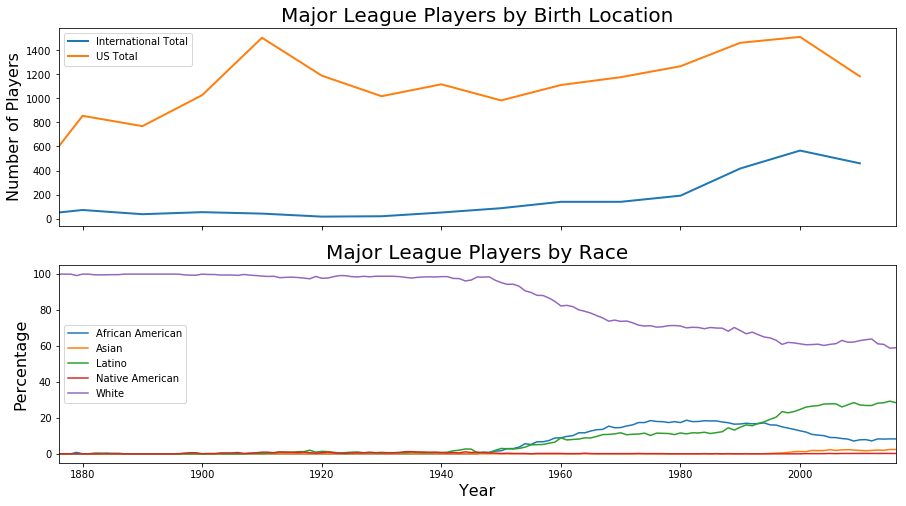

In [264]:
fig, ax = plt.subplots(figsize=(15,8), nrows=2, ncols=1, sharex=True)

Total.plot(ax=ax[0], linewidth=2.0)
ax[0].set_title('Major League Players by Birth Location', fontsize=20)
ax[0].legend(fontsize=10, loc='best')
ax[0].set_ylabel('Number of Players', fontsize=16)
ax[0].set_xlabel('Decade of Debut', fontsize=16)
RTable.plot(ax=ax[1])
ax[1].set_title('Major League Players by Race', fontsize=20,)
ax[1].legend(fontsize=10)
ax[1].set_ylabel('Percentage', fontsize=16)
ax[1].set_xlabel('Year', fontsize=16)

Both the number of international players and US born players has steadily increased over the past 100 years. This is due to the expansion of Major League Baseball from just 8 teams to its current structure of 30. While the league is still dominated by US-born players, it will be interesting to see if international players continue to steal share moving forward. Only time will tell.